In [1]:
from __future__ import division 
import h5py as h5

%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from matplotlib import rc                                                                                                                                                                                                                    
from matplotlib import rcParams
rc('font', family='serif')



matplotlib.rcParams['xtick.major.size'] = 12
matplotlib.rcParams['ytick.major.size'] = 12
matplotlib.rcParams['xtick.minor.size'] = 8
matplotlib.rcParams['ytick.minor.size'] = 8
fs = 30

In [25]:
def obtainDCOData_STROOPWAFEL(param, global_param):
    """returns for STROOPWAFEL (AIS) simulation 
    an array consisting of the 3 parameters: xparam, yparam, and the weights. 
    xparam and yparam need to be the labels from the allDoubleCompactObjects.dat"""
    
    pathdisk, DCOtype, DirName, boolDCOmask  = global_param 
    
    Hubble, RLOF, Pessimistic = boolDCOmask
    xparam, fxparam = param

    
    pathAISexpl = pathdisk + DirName +'/AIS_exploratory/COMPASOutput.h5'   # '/home/floor/Data_Thesis/bdMC/Z0_002'
    pathAISref  = pathdisk + DirName +'/AIS_sampling/COMPASOutput.h5'    # '/home/floor/Data_Thesis/bdMC/Z0_002'


    fAISexpl = h5.File(pathAISexpl)
    fAISref = h5.File(pathAISref)
      
    fDCOAISexpl = fAISexpl['doubleCompactObjects']
    fDCOAISref  = fAISref['doubleCompactObjects']

    print(list(fAISexpl.keys()))
    
    
    fallAISexpl = fAISexpl['systems']
    fallAISref  = fAISref['systems']
    
    fDCOweightsAISexpl =  fAISexpl['doubleCompactObjectsWeights']
    fDCOweightsAISref =  fAISref['doubleCompactObjectsWeights']

    if DCOtype == 'BNS':
        mask0AISexpl = ((fDCOAISexpl['stellarType1'][...] == 13) & (fDCOAISexpl['stellarType2'][...] == 13))
        mask0AISref = ((fDCOAISref['stellarType1'][...] == 13) & (fDCOAISref['stellarType2'][...] == 13))


    if (DCOtype == 'BHNS') | (DCOtype == 'NSBH'):
        mask0AISexpl = ((fDCOAISexpl['stellarType1'][...] == 13) & (fDCOAISexpl['stellarType2'][...] == 14)) | \
            ((fDCOAISexpl['stellarType1'][...] == 14) & (fDCOAISexpl['stellarType2'][...] == 13) )          
        mask0AISref = ((fDCOAISref['stellarType1'][...] == 13) & (fDCOAISref['stellarType2'][...] == 14)) | \
            ((fDCOAISref['stellarType1'][...] == 14) & (fDCOAISref['stellarType2'][...] == 13) )

    if DCOtype == 'BBH':
        mask0AISexpl = ((fDCOAISexpl['stellarType1'][...] == 14) & (fDCOAISexpl['stellarType2'][...] == 14))
        mask0AISref = ((fDCOAISref['stellarType1'][...] == 14) & (fDCOAISref['stellarType2'][...] == 14))

    if (DCOtype == 'all') | (DCOtype == 'ALL') :
        mask0AISexpl = ((fDCOAISexpl['stellarType1'][...] == 14) | (fDCOAISexpl['stellarType1'][...] == 13))
        mask0AISref = ((fDCOAISref['stellarType1'][...] == 14) | (fDCOAISref['stellarType1'][...] == 13))

    # Hubble mask
    if Hubble:
        mask1AISexpl = (fDCOAISexpl['mergesInHubbleTimeFlag'][...]==True) 
        mask1AISref = (fDCOAISref['mergesInHubbleTimeFlag'][...]==True) 
    elif not Hubble:
        mask1AISexpl = (fDCOAISexpl['mergesInHubbleTimeFlag'][...]==True) |  (fDCOAISexpl['mergesInHubbleTimeFlag'][...]==False) 
        mask1AISref = (fDCOAISref['mergesInHubbleTimeFlag'][...]==True) |  (fDCOAISref['mergesInHubbleTimeFlag'][...]==False) 
       
    # RLOF mask
    if RLOF:
        mask2AISexpl = (fDCOAISexpl['RLOFSecondaryAfterCEE'][...]==False)
        mask2AISref = (fDCOAISref['RLOFSecondaryAfterCEE'][...]==False)
    elif not RLOF:
        mask2AISexpl = (fDCOAISexpl['RLOFSecondaryAfterCEE'][...]==False) | (fDCOAISexpl['RLOFSecondaryAfterCEE'][...]==True)
        mask2AISref = (fDCOAISref['RLOFSecondaryAfterCEE'][...]==False) |  (fDCOAISref['RLOFSecondaryAfterCEE'][...]==True)

    # Pessimistic mask :  mask systems that have optimistic CE flag?
    if Pessimistic:
        mask3AISexpl = np.logical_not(fDCOAISexpl["optimisticCEFlag"][...] == 1)
        mask3AISref  = np.logical_not(fDCOAISref["optimisticCEFlag"][...] == 1)
    elif not Pessimistic:
        mask3AISexpl = np.logical_not(fDCOAISexpl["optimisticCEFlag"][...] == 1) + \
        np.logical_not(fDCOAISexpl["optimisticCEFlag"][...] == 0)   
        mask3AISref = np.logical_not(fDCOAISref["optimisticCEFlag"][...] == 1) + \
        np.logical_not(fDCOAISref["optimisticCEFlag"][...] == 0) 

    combinedMaskAISexpl = mask0AISexpl * mask1AISexpl * mask2AISexpl * mask3AISexpl
    combinedMaskAISref = mask0AISref * mask1AISref * mask2AISref * mask3AISref





        
    if fxparam == 'doubleCompactObjects':
        
        ##### AIS EXPL PHASE ############
        xvaluesAISexpl           = fAISexpl[fxparam][xparam][...][combinedMaskAISexpl].squeeze()

        ####### AIS REFINEMENT PHASE ##########
        xvaluesAISref           = fAISref[fxparam][xparam][...][combinedMaskAISref].squeeze()

    else: # works at least for fxparam == 'systems', 
        
        ##### AIS EXPL PHASE ############
        # formation channels is big, say you only want the channels of the DCO systems
        seedsOfIntererstAISexpl = fDCOAISexpl['seed'][combinedMaskAISexpl]
        seedsAISexpl = fAISexpl[fxparam]['randomSeed'][...].squeeze()
        boolsAISexpl = np.in1d(seedsAISexpl, seedsOfIntererstAISexpl)

        xvaluesAISexpl           = fAISexpl[fxparam][xparam][...].squeeze()[boolsAISexpl]


        ####### AIS REFINEMENT PHASE ##########
        seedsOfIntererstAISref = fDCOAISref['seed'][combinedMaskAISref]
        seedsAISref = fAISref[fxparam]['randomSeed'][...].squeeze()
        boolsAISref = np.in1d(seedsAISref, seedsOfIntererstAISref)      
    
        xvaluesAISref           = fAISref[fxparam][xparam][...].squeeze()[boolsAISref]
        
        
        
        
    #determine DCO weights 
    weightsAISexpl           = fDCOweightsAISexpl['weight'][...][combinedMaskAISexpl].squeeze()
    weightsAISref           = fDCOweightsAISref['weight'][...][combinedMaskAISref].squeeze() 
    
    ####################### COMBINED AIS ################# 
    xvaluesAIS         = np.concatenate((xvaluesAISexpl, xvaluesAISref))
    weightsAIS         = np.concatenate((weightsAISexpl, weightsAISref))
    
    
    parametersAIS = xvaluesAIS, weightsAIS 

    
    return   parametersAIS




In [26]:



def sampling_from_IMF(Nsamples): 


    kroupaPower1 = -0.3
    kroupaPower2 = -1.3
    kroupaPower3 = -2.3

    # // Often require the np.powerer law exponent plus one
    kroupaPowerPlus1_1 = 0.7
    kroupaPowerPlus1_2 = -0.3
    kroupaPowerPlus1_3 = -1.3

    # // There are two breaks in the Kroupa np.powerer law -- they occure here (in solar masses)
    kroupaBreak1 = 0.08     
    kroupaBreak2 = 0.5
    #  C is the normalisation constant for the integral of the IMF over the desired range
    C = 0.0# 
    # will hold a uniform random number U(0,1)
    u = 0.0


    initialMassFunctionMin = 0.08
    initialMassFunctionMax = 150	

    firstBrackets = (1.0/kroupaPowerPlus1_2)*(np.power(kroupaBreak2, kroupaPowerPlus1_2) - np.power(initialMassFunctionMin, kroupaPowerPlus1_2))
    secondBrackets = (1.0/kroupaPowerPlus1_3)*(np.power(initialMassFunctionMax, kroupaPowerPlus1_3) - np.power(kroupaBreak2, kroupaPowerPlus1_3))

    C = firstBrackets + secondBrackets

    u =  np.random.uniform(0,1,Nsamples)             #// Draw a random number between 0 and 1

    thisMass = np.zeros_like(u)

    mask1 = (u < firstBrackets/C)
    mask2 = (u >= firstBrackets/C)
    thisMass[mask1] = np.power(((C * u[mask1] * kroupaPowerPlus1_2) + np.power(initialMassFunctionMin, kroupaPowerPlus1_2)), (1.0/kroupaPowerPlus1_2))
    thisMass[mask2] = np.power(((((C * u[mask2]) - firstBrackets)*kroupaPowerPlus1_3) + np.power(kroupaBreak2, kroupaPowerPlus1_3)), (1.0/kroupaPowerPlus1_3))

    return thisMass


def sampling_from_q(Nsamples):
    '''returns  N samples distributed uniformly '''
    
    # Full range of mass ratio q:
    [a_q, b_q] = [0,1]
    return np.random.uniform(a_q, b_q, Nsamples)



In [27]:



def ObtainEquivalentMassCOMPASsimulation(COMPASbox, Nbinaries, NsamplesMCres):
    '''Runs a Monte Carlo simulation to determine what the mass fraction is  in your COMPAS simulation
       compared to what it would be equivalent to if you would have included the entire parameter range
       (e.g. if you would have included low mass stars) assumes binary fraction f = 1
       
       INPUT: 
       COMPASbox = [5, 150, 0, 1, 0.01, 1000, 0.1]  #  = [m1_min, m1_max, q_min, q_max, a_min, a_max, min_m2] 
       Nbinaries = 1E6  is the number of binaries simulated in your model (usually 1E6) 
       NsamplesMCres  = 1E8 (is the nr of samples used for the Monte Carlo simulation to calculate the equivalent mass)
       '''
    
    m1_min, m1_max, q_min, q_max, a_min, a_max, min_m2 = COMPASbox 

    # obtain large MC sample for m1 and m2 (masses binary) 
    m1s = sampling_from_IMF(NsamplesMCres) 
    qs = sampling_from_q(NsamplesMCres)
    m2s =  qs * m1s 
    
    # now mask binaries in the COMPAS box. 
    maskCOMPASm = ((m1s >= m1_min) & (m1s <=m1_max) &   (m2s >= min_m2))  
    
    fractionSamplesInCOMPAS = np.sum(maskCOMPASm) / len(maskCOMPASm)
    
    #  calculate the mass from the Monte Carlo simulation that belongs to the COMPAS box 
    TotalMassCOMPAS = np.sum(m1s[maskCOMPASm]) + np.sum(m2s[maskCOMPASm])
    # calculate the entire mass in the Monte Carlo simulation.
    TotalMassALL =  np.sum(m1s) + np.sum(m2s)
    # The fraction of mass of COMPAS to all mass from the entire parameter space is:
    fractionTotalMassCOMPAS = TotalMassCOMPAS / TotalMassALL
    

    meanMassBinaryCOMPAS = (TotalMassCOMPAS / np.sum(maskCOMPASm))  # average mass per system in a COMPAS box
    meanMassBinaryEquivalentCOMPAS = meanMassBinaryCOMPAS / fractionTotalMassCOMPAS  # average equivalent mass per system from COMPAS box (in reality 1 system also represents smaller mass systems)


    EquivalentSimulatedMassCOMPAS = meanMassBinaryEquivalentCOMPAS * Nbinaries # now times the number of binaries that was simulated
    
    return EquivalentSimulatedMassCOMPAS
    


    
    
def obtainM1BHandM2BHassymetric(m1, m2):
    "masses from COMPAS into assymetric masses where m1bh > m2bh "
    m1bh, m2bh = np.zeros_like(m1), np.zeros_like(m1)
    maskm1heavier = ( m1 >= m2)
    maskm2heavier = (m1 < m2)
    
    m1bh[maskm1heavier] = m1[maskm1heavier] 
    m1bh[maskm2heavier] = m2[maskm2heavier]
    m2bh[maskm1heavier] = m2[maskm1heavier]
    m2bh[maskm2heavier] = m1[maskm2heavier]
    
    return m1bh, m2bh # m1bh has all the heaviest systems

        
   
    

In [12]:
# this is true for my Z = 0.002 simulations :-) 
myCOMPASbox = [5, 150, 0, 1, 0.01, 1000, 0.1]  #  = [m1_min, m1_max, q_min, q_max, a_min, a_max, min_m2]  [parameter box values or parameter space limits]

EquivalentMassCOMPAS_1E6binaries = ObtainEquivalentMassCOMPASsimulation(COMPASbox= myCOMPASbox, Nbinaries=1E6,  NsamplesMCres = int(1E8))  
print('a simulation with COMPAS with 1E6 binaries is equivalent to this much mass formed: ', EquivalentMassCOMPAS_1E6binaries)

a simulation with COMPAS with 1E6 binaries is equivalent to this much mass formed:  64681181.75834824


In [18]:
def CalculateRate(pathdisk, DCOtypeList, DirNameList, boolDCOmask, EquivalentMassCOMPASsimulation):
    '''  
    pathdisk = '/Volumes/TOSHIBA EXT/Stroopwafel2_0/' # path to directories with data 
    DCOtypeList =  ['ALL', 'BBH', 'BHNS', 'BNS'] # names of directories with data 
    boolDCOmask = [True, True, False]   # VALUE FOR = [Hubble, RLOF, Pessimistic]
    EquivalentMassCOMPASsimulation = Equivalent mass of the COMPAS simulation run in [Msun]
    '''
    


    SFR = 2.0*10**6 # [SFR] = Msol Myr^-1 # The continuous star formation rate \
    # assumed in a Milky Way like Galaxy (see e.g. Dominik 2012 or de Mink & Belczynski for reference)  
#     # Convert this to a MW like galaxy  for 10 Gyr age
#     MWEGStarFormation=10*(10**3)*SFR  

    # global parameters
    globpar = [pathdisk, DCOtypeList, DirNameList, boolDCOmask]
    
    #get any parameter to calculate the rate, here we picked 'M1'
    DCOM1,  DCOweights = obtainDataSTROOPWAFEL(param = ['M1', 'doubleCompactObjects'], global_param = globpar)

    sumDCOweight = np.sum(DCOweights)
    rateDCOinCOMPAS = sumDCOweight / 
                

            
        #  calculate the rate in COMPAS box of Candidates
        DCOweightsCandidates = DCOweights[maskCandidates] 
        CandidateWeight = np.sum(DCOweightsCandidates) # total weight in simulation of all Candidates
        CandidateRateCOMPAS = CandidateWeight / 1E6 #  equivalent to usually #DCOs / #systemsEvolved in COMPAS box
        
        #  calculate the rate in COMPAS box of Candidates
        DCOWeight = np.sum(DCOweights) # total weight in simulation of all Candidates
        RateDCOCOMPAS = DCOWeight / 1E6 #  equivalent to usually #DCOs / #systemsEvolved in COMPAS box, // floor make 1E6 a parameter !!! now fixed hard coded 


        # The merger rate per Myr then becomes (for an MWEG): 
#         CandidateRate = (CandidateWeight / EquivalentMassCOMPASsimulation ) *SFR  #  'rate of Candidates per  Myr (in a MWEG since we assumed that for SFR) '   
        
        MsolMassPerCandidate = EquivalentMassCOMPASsimulation / CandidateWeight
        MsolMassPerAllMergers = EquivalentMassCOMPASsimulation / DCOWeight
        
        NRbinaries = [len(DCOweights), len(DCOweights[maskCandidates])]

    
    return MsolMassPerCandidate, MsolMassPerAllMergers, NRbinaries, ListFractionBHNSCandidatesDisrupted

In [23]:
pathname = '/Volumes/TOSHIBA EXT/BHNSpaper19/'

UFDpar = [0.1, 4.6] # [epsilon, Kpc Rvir radius of UFD galaxy ]  (See Mohammad et al. 2018)     epsilon = 0.1 // Floor double check

ModelNamesList = ['', 'Fiducial', '', 'Fiducial', 'Z=.0002', 'red kick ', 'alpha =.1', 'alpha = 10', 'rapid SN' ]



bhSpinValues = np.linspace(0.,1,5)
DirNames = [['BHNSZ0_002', 'BHNSZ0_0002', 'BHNSZ0_002_REDUCEDBHkick', 'BHNSZ0_002_alpha0_1', 'BHNSZ0_002_alpha10', 'BHNSZ0_002_RAPID' ], [ 'BNSZ0_002']]




MsolMassPerCandidate, MsolMassPerAllMergers, NRbinaries, _ = CalculateRateEnrichingUFD(pathdisk = pathname, DCOtypeList =   ['BNS'], DirNameList =  DirNames[0][0], \
    boolDCOmask = [True, True, False], UFDpar = UFDpar, ListXbhValues = ListXbhValues,  Rns = Rns, EquivalentMassCOMPASsimulation = EquivalentMassCOMPASsimulation )


NameError: name 'ListXbhValues' is not defined

In [ ]:
def CalculateRates_STROOPWAFEL(pathname, directory_names, names,  EquivalentMassCOMPASsimulation):
    '''  
    pathdisk = '/Volumes/TOSHIBA EXT/Stroopwafel2_0/' # path to directories with data 
    directory_names [['BHNSZ0_002', 'BHNSZ0_0002', 'BHNSZ0_002_REDUCEDBHkick'], [ 'BNSZ0_002']]
    UFDpar = [epsilon, Rvir] in [#,  kpc]
    boolDCOmask = [True, True, False]   # VALUE FOR = [Hubble, RLOF, Pessimistic]
    ListXbhValues = [Xbh0, Xbh1, Xbh2, .. Xbhn] list of values X spin parameter of black hole allowed 
    Rns = assumed radius of the NSs in [Rsun]
    EquivalentMassCOMPASsimulation = Equivalent mass of the COMPAS simulation run in [Msun]
    '''    
    
    # names = DirNames in [['BH-NS dir names'], ['NS-NS dir names']]

    # Constants 
#     SFR = 2.0 *10E6 #2.0*10**6 # [SFR] = Msol Myr^-1 # The continuous star formation rate \
    # assumed in a Milky Way like Galaxy (see e.g. Dominik 2012 or de Mink & Belczynski for reference)     
    
     

    ListBHNSdirectory, ListBNSdirectory = directory_names #
    nrBNSsimulations = len(ListBNSdirectory)
    

    
    
    
    ############.  BNS data #########
    for indBNSdirectory, BNSdirectory in enumerate(ListBNSdirectory):

        #OPTIMISTIC
        MsolMassPerCandidate, MsolMassPerAllMergers, NRbinaries, _ = CalculateRateEnrichingUFD(pathdisk = pathname, DCOtypeList =   ['BNS'], DirNameList =  [BNSdirectory], \
            boolDCOmask = [True, True, False], UFDpar = UFDpar, ListXbhValues = ListXbhValues,  Rns = Rns, EquivalentMassCOMPASsimulation = EquivalentMassCOMPASsimulation )
        
        nrDCO, nrCandidateDCO = NRbinaries
        
        RateMyrCandidate =  EquivalentMassCOMPASsimulation / MsolMassPerCandidate  #  COMPAS weight.  (1. / MsolMassPerCandidate)  * 1E6  #  [year^-1 SFR^-1 ]  # Myr EquivalentMassCOMPASsimulation / CandidateWeight
        RateMyrAll =  EquivalentMassCOMPASsimulation / MsolMassPerAllMergers #  COMPAS weight (1. / MsolMassPerAllMergers) * 1E6  #  [year^-1 SFR^-1 ] 
      
        
        print('rate all BNS = ', RateMyrAll, 'rate BNS Candidates ',  RateMyrCandidate, 'fraction =', RateMyrCandidate / RateMyrAll)
        print('Nr DCOs = ', nrDCO, 'nr Candidate = ', nrCandidateDCO)
        print()
#         axarr1.scatter(indBNSdirectory+1, RateMyrCandidate, s = 200, marker = 'o', c = 'teal', zorder = 3)
#         axarr1.scatter(indBNSdirectory+1, RateMyrAll      , s = 200, marker = 'o', c = 'gray', zorder = 3)



    
    
    ############.  BHNS data #########    
    for indBHNSdirectory, BHNSdirectory in enumerate(ListBHNSdirectory):

        
        #OPTIMISTIC
        MsolMassPerCandidate, MsolMassPerAllMergers, NRbinaries, ListFractionBHNSCandidatesDisrupted = CalculateRateEnrichingUFD(pathdisk = pathname, DCOtypeList =   ['BHNS'], DirNameList =  [BHNSdirectory], \
            boolDCOmask = [True, True, False], UFDpar = UFDpar, ListXbhValues = ListXbhValues,  Rns = Rns, EquivalentMassCOMPASsimulation = EquivalentMassCOMPASsimulation )   
        
        nrDCO, nrCandidateDCO = NRbinaries
        
        RateMyrCandidate =  EquivalentMassCOMPASsimulation / MsolMassPerCandidate  #  COMPAS weight.  (1. / MsolMassPerCandidate)  * 1E6  #  [year^-1 SFR^-1 ]  # Myr EquivalentMassCOMPASsimulation / CandidateWeight
        RateMyrAll =  EquivalentMassCOMPASsimulation / MsolMassPerAllMergers #  COMPAS weight (1. / MsolMassPerAllMergers) * 1E6  #  [year^-1 SFR^-1 ] 
        
        print('rate all BHNS = ', RateMyrAll, 'rate BHNS Candidates ',  RateMyrCandidate *  ListFractionBHNSCandidatesDisrupted, 'fraction =', RateMyrCandidate / RateMyrAll)
        print('Nr DCOs = ', nrDCO, 'nr Candidate = ', nrCandidateDCO)
        print('for Xeff = ', ListXbhValues)
        print()
#         axarr1.scatter([indBHNSdirectory + nrBNSsimulations +2]*len(ListFractionBHNSCandidatesDisrupted), RateMyrCandidate * ListFractionBHNSCandidatesDisrupted ,\
#                        s = 200, marker = 's',  c = ListXbhValues, cmap = cmapCustom, edgecolor='black', linewidth=1 )

#         axarr1.scatter(indBHNSdirectory + nrBNSsimulations +2, RateMyrAll , s = 200, marker = 's', c = 'gray' )
 
    

In [ ]:
# EquivalentMassCOMPASsimulation = ObtainEquivalentMassCOMPASsimulation(COMPASbox, Nbinaries=1E6,  NsamplesMCres = int(1E9))
# print( EquivalentMassCOMPASsimulation)

In [29]:
def CalculateRateEnrichingUFD(pathdisk, DCOtypeList, DirNameList, boolDCOmask, UFDpar, ListXbhValues, Rns, EquivalentMassCOMPASsimulation):
    '''  
    pathdisk = '/Volumes/TOSHIBA EXT/Stroopwafel2_0/' # path to directories with data 
    DCOtypeList =  ['ALL', 'BBH', 'BHNS', 'BNS'] # names of directories with data 
    UFDpar = [epsilon, Rvir] in [#,  kpc]
    boolDCOmask = [True, True, False]   # VALUE FOR = [Hubble, RLOF, Pessimistic]
    ListXbhValues = [Xbh0, Xbh1, Xbh2, .. Xbhn] list of values X spin parameter of black hole allowed 
    Rns = assumed radius of the NSs in [Rsun]
    EquivalentMassCOMPASsimulation = Equivalent mass of the COMPAS simulation run in [Msun]
    '''
    
    # Constants 
    KpcToKM = 3.086 * 10**(16) # kpc to km  
    MyrToYr = 1E6 # yrs
    YrToSec = 3.154 *1E7 #sec

    SFR = 2.0*10**6 # [SFR] = Msol Myr^-1 # The continuous star formation rate \
    # assumed in a Milky Way like Galaxy (see e.g. Dominik 2012 or de Mink & Belczynski for reference)  
#     # Convert this to a MW like galaxy  for 10 Gyr age
#     MWEGStarFormation=10*(10**3)*SFR  

    # global parameters
    globpar = [pathdisk, DCOtypeList, DirNameList, boolDCOmask]
    UFDepsilon, UFDrvir = UFDpar
    

 

    for ii, _ in enumerate(DCOtypeList): 
        # for i in len()DCOlist:, the following are the parameters of the selected DCOmask systems
        # obtain coalescence time in [Myr] 
        tc,  DCOweights = obtainDataSTROOPWAFEL(i = ii, param = ['tc', 'doubleCompactObjects'], global_param = globpar)
        # obtain systematic velocity of binary in [km/s]
        vsys, _ = obtainDataSTROOPWAFEL(i = ii, param = ['systemicVelocity', 'supernovae'], global_param = globpar)
        ## SN are double since we have 2 SN per merging system. But 1st SN is always primary, and 2nd seconday. 
        #  For enriching we are interested in systematic velocity after 2nd supernova. Therefore we take vsys[1:] 
        vsys = vsys[1:][::2]

        # determine which DCO systems are candidate for enriching UFD galaxies:
        traveldistance = tc * vsys *  MyrToYr * YrToSec  # this is in km 
        radiusUFDgalaxy = UFDepsilon * UFDrvir * KpcToKM   # enriching radius in km 
        maskCandidates = (traveldistance <= radiusUFDgalaxy) # the DCO is a candidate if it merges before travelling outside of the galaxy


        if DCOtypeList[ii] == 'BHNS':
            m1 , _ = obtainDataSTROOPWAFEL(i = ii, param = ['M1', 'doubleCompactObjects'], global_param = globpar)
            m2 , _ = obtainDataSTROOPWAFEL(i = ii, param = ['M2', 'doubleCompactObjects'], global_param = globpar)
            
            r_ns = np.asarray([Rns]*len(m1)) # radius in Rsun
            
            
            m1bh, m2ns = obtainM1BHandM2BHassymetric(m1, m2)
            
            
            ListFractionBHNSCandidatesDisrupted = np.zeros_like(ListXbhValues)
            for indXeff, Xeff in enumerate(ListXbhValues):
                Mejected = calculateEjectedMassMerger(m2ns, r_ns, m1bh, Xeff)

                maskCandidatesBHNSnotDisrupted = (traveldistance <= radiusUFDgalaxy) & (Mejected > 0)
                fractionBHNSCandidatesDisrupted = np.sum(maskCandidatesBHNSnotDisrupted) / np.sum(maskCandidates)
                ListFractionBHNSCandidatesDisrupted[indXeff] = fractionBHNSCandidatesDisrupted
                
        else:
            ListFractionBHNSCandidatesDisrupted, ListXbhValues = [], []
            
        #  calculate the rate in COMPAS box of Candidates
        DCOweightsCandidates = DCOweights[maskCandidates] 
        CandidateWeight = np.sum(DCOweightsCandidates) # total weight in simulation of all Candidates
        CandidateRateCOMPAS = CandidateWeight / 1E6 #  equivalent to usually #DCOs / #systemsEvolved in COMPAS box
        
        #  calculate the rate in COMPAS box of Candidates
        DCOWeight = np.sum(DCOweights) # total weight in simulation of all Candidates
        RateDCOCOMPAS = DCOWeight / 1E6 #  equivalent to usually #DCOs / #systemsEvolved in COMPAS box, // floor make 1E6 a parameter !!! now fixed hard coded 


        # The merger rate per Myr then becomes (for an MWEG): 
#         CandidateRate = (CandidateWeight / EquivalentMassCOMPASsimulation ) *SFR  #  'rate of Candidates per  Myr (in a MWEG since we assumed that for SFR) '   
        
        MsolMassPerCandidate = EquivalentMassCOMPASsimulation / CandidateWeight
        MsolMassPerAllMergers = EquivalentMassCOMPASsimulation / DCOWeight
        
        NRbinaries = [len(DCOweights), len(DCOweights[maskCandidates])]

    
    return MsolMassPerCandidate, MsolMassPerAllMergers, NRbinaries, ListFractionBHNSCandidatesDisrupted
    


In [118]:
# # path = '/Volumes/TOSHIBA EXT/Stroopwafel2_0/'

# def PlotTotalMassNeededCandidatesXeff(pathname, directory_names, names, UFDparameters,  ListXbhValues, Rns, EquivalentMassCOMPASsimulation):
#     '''  
#     pathdisk = '/Volumes/TOSHIBA EXT/Stroopwafel2_0/' # path to directories with data 
#     directory_names [['BHNSZ0_002', 'BHNSZ0_0002', 'BHNSZ0_002_REDUCEDBHkick'], [ 'BNSZ0_002']]
#     UFDpar = [epsilon, Rvir] in [#,  kpc]
#     boolDCOmask = [True, True, False]   # VALUE FOR = [Hubble, RLOF, Pessimistic]
#     ListXbhValues = [Xbh0, Xbh1, Xbh2, .. Xbhn] list of values X spin parameter of black hole allowed 
#     Rns = assumed radius of the NSs in [Rsun]
#     EquivalentMassCOMPASsimulation = Equivalent mass of the COMPAS simulation run in [Msun]
#     '''
#     # names = DirNames in [['BH-NS dir names'], ['NS-NS dir names']]

#     # Constants 
#     SFR = 2.0*10**6 # [SFR] = Msol Myr^-1 # The continuous star formation rate \
#     # assumed in a Milky Way like Galaxy (see e.g. Dominik 2012 or de Mink & Belczynski for reference)     
    
#     f, (axarr1) = plt.subplots(1, 1,  figsize=(20,14))   

#     ListBHNSdirectory, ListBNSdirectory = directory_names #
#     nrBHNSsimulations = len(ListBHNSdirectory)
    
    
    
#     ############.  BHNS data #########    
#     for indBHNSdirectory, BHNSdirectory in enumerate(ListBHNSdirectory):
#         print(BHNSdirectory)
#         print()
        
        
#         #OPTIMISTIC
#         MsolMassPerCandidate, ListFractionBHNSCandidatesDisrupted = CalculateRateEnrichingUFD(pathdisk = pathname, \
#                               DCOtypeList =   ['BHNS'], DirNameList =  [BHNSdirectory], boolDCOmask = [True, True, False], UFDpar = UFDparameters, ListXeff =  ListXbhValues )   
#         nalpha = len(ListFractionBHNSCandidatesDisrupted)
#         alphavalues = np.linspace(0.1, 1, nalpha)
        
#         for indXeff, fractionDisrupted in enumerate(ListFractionBHNSCandidatesDisrupted):
#             axarr1.scatter(2 * indBHNSdirectory, MsolMassPerCandidate / fractionDisrupted, s = 200, marker = 's', c = 'k', alpha = alphavalues[indXeff] )
#             axarr1.scatter(2 * indBHNSdirectory, (MsolMassPerCandidate / fractionDisrupted)/5, s = 200, marker = 's', c = 'r', alpha = alphavalues[indXeff] )
#         # PESSIMISTIC
        
#         MsolMassPerCandidate, ListFractionBHNSCandidatesDisrupted = CalculateRateEnrichingUFD(pathdisk = pathname, \
#                               DCOtypeList =   ['BHNS'], DirNameList =  [BHNSdirectory], boolDCOmask = [True, True, True], UFDpar = UFDparameters, ListXeff =  ListXbhValues )  
        
        
#         for indXeff, fractionDisrupted in enumerate(ListFractionBHNSCandidatesDisrupted):
#             axarr1.scatter(2 * indBHNSdirectory + 1, MsolMassPerCandidate / fractionDisrupted, s = 200, marker = 's', c = 'k', alpha = alphavalues[indXeff])
#             axarr1.scatter(2 * indBHNSdirectory + 1, (MsolMassPerCandidate / fractionDisrupted)/5, s = 200, marker = 's', c = 'r', alpha = alphavalues[indXeff])
  

#     cmapCustom = matplotlib.colors.LinearSegmentedColormap.from_list("", [   "#E5E5E5", 'k'], N = len(ListFractionBHNSCandidatesDisrupted))
#     cmapping = axarr1.scatter([1E6]*nalpha, [1E22] * nalpha, c =  ListXbhValues, cmap = cmapCustom)
# #     print()
# #     print( ListXbhValues, ' ListXbhValues')
# #     print()
    
#     rounded ListXbhValues = np.around( ListXbhValues, 3)
# #     print(rounded ListXbhValues)
#     cbarr = plt.colorbar(cmapping, ax=axarr1, ticks= np.linspace(1/(2*nalpha),(2*nalpha-1)/(2*nalpha),nalpha) ) # ticklocation =  ListXbhValues)
#     cbarr.ax.set_yticklabels( ListXbhValues)
    
# #         cbarr.set_ticklabels( ListXbhValues, update_ticks=True) #, ticksize = fs-5)
#     cbarr.ax.tick_params(labelsize=fs-6, pad = 20)
#     cbarr.ax.set_ylabel(r' $\chi_{\rm{eff}}  $', fontsize = fs + 5)      
    
    
#     ############.  BNS data #########
#     for indBNSdirectory, BNSdirectory in enumerate(ListBNSdirectory):
#         print(BNSdirectory)
#         print()
#         #OPTIMISTIC
#         MsolMassPerCandidate, _ = CalculateRateEnrichingUFD_v2(pathdisk = pathname, \
#                               DCOtypeList =   ['BNS'], DirNameList =  [BNSdirectory], boolDCOmask = [True, True, False], UFDpar = UFDparameters, ListXeff =  ListXbhValues )     
#         axarr1.scatter(2 * nrBHNSsimulations + 2*indBNSdirectory, MsolMassPerCandidate, s = 200, marker = 'o', c = 'k', zorder = 3)
#         axarr1.scatter(2 * nrBHNSsimulations + 2*indBNSdirectory, MsolMassPerCandidate/5, s = 200, marker = 'o', c = 'r', zorder = 2)

 
        
#         #     axarr1.scatter( range(8)[::2], MassPerCandidateList[::2]/5, s= 200, marker = 's', c= 'r')
#         # PESSIMISTIC
#         MsolMassPerCandidate, _ = CalculateRateEnrichingUFD_v2(pathdisk = pathname, \
#                               DCOtypeList =   ['BNS'], DirNameList =  [BNSdirectory], boolDCOmask = [True, True, True], UFDpar = UFDparameters, ListXeff =  ListXbhValues )        
#         axarr1.scatter(2 * nrBHNSsimulations + 2 * indBNSdirectory + 1, MsolMassPerCandidate, s = 200, marker = 'o', c = 'k', zorder = 3)        
#         axarr1.scatter(2 * nrBHNSsimulations + 2 * indBNSdirectory + 1, MsolMassPerCandidate/5, s = 200, marker = 'o', c = 'r', zorder = 2)        


    
#     axarr1.tick_params(labelsize=fs/2)
#     axarr1.ticklabel_format(style = 'sci', axis = 'both')
#     axarr1.set_ylabel(r'$M_{*} \, (M_{\odot})$' , fontsize = fs)
#     # axarr1.set_xlabel(r'$\log_{10}\, a \, [R_{\odot}]$', fontsize = fs_text)
#     axarr1.grid(True)
#     axarr1.tick_params(labelsize=fs)
#     axarr1.set_yscale('log')
#     axarr1.set_ylim(1E4,1E9)
#     axarr1.set_xlim(-1, 2 * nrBHNSsimulations + 2 * indBNSdirectory + 2 )
    
#     axarr1.axes.fill_between([-0.1, 1, 2, 3, 4, 5, 6, 7.1], 8*[36000], 8*[200000], color = 'gray', alpha = 0.3)
#     axarr1.text(1, 10**4.8, "               Tucana III progenitor stellar mass", fontsize = fs)
    
#     axarr1.axes.fill_between([-0.1, 1, 2, 3, 4, 5, 6, 7.1], (20-4)*1E3, (20+4)*1E3, color = 'gray', alpha = 0.5)
#     axarr1.text(1, 18*1E3, "               Reticulum II progenitor stellar mass", fontsize = fs)
    
    
#     plt.xticks(range(8), names, rotation=45)
#     plt.tight_layout()
# #     plt.savefig('/Users/fbro0003/Documents/git/popsynth/Papers/BroekgaardenEtAl/BHNSmergers/images/FormationRateUFDEnrichingMergers2.png', dpi = 300)
# #     plt.savefig('/Users/fbro0003/Documents/git/popsynth/Papers/BroekgaardenEtAl/BHNSmergers/images/FormationRateUFDEnrichingMergers2.pdf')
#     plt.show()  

    
    
    


In [215]:


def PlotRateCandidatesXeff(pathname, directory_names, names, UFDpar, ListXbhValues,  Rns, EquivalentMassCOMPASsimulation ):
    '''  
    pathdisk = '/Volumes/TOSHIBA EXT/Stroopwafel2_0/' # path to directories with data 
    directory_names [['BHNSZ0_002', 'BHNSZ0_0002', 'BHNSZ0_002_REDUCEDBHkick'], [ 'BNSZ0_002']]
    UFDpar = [epsilon, Rvir] in [#,  kpc]
    boolDCOmask = [True, True, False]   # VALUE FOR = [Hubble, RLOF, Pessimistic]
    ListXbhValues = [Xbh0, Xbh1, Xbh2, .. Xbhn] list of values X spin parameter of black hole allowed 
    Rns = assumed radius of the NSs in [Rsun]
    EquivalentMassCOMPASsimulation = Equivalent mass of the COMPAS simulation run in [Msun]
    '''    
    
    # names = DirNames in [['BH-NS dir names'], ['NS-NS dir names']]

    # Constants 
#     SFR = 2.0 *10E6 #2.0*10**6 # [SFR] = Msol Myr^-1 # The continuous star formation rate \
    # assumed in a Milky Way like Galaxy (see e.g. Dominik 2012 or de Mink & Belczynski for reference)     
    
    
    f, (axarr1) = plt.subplots(1, 1,  figsize=(16,10))   

    ListBHNSdirectory, ListBNSdirectory = directory_names #
    nrBNSsimulations = len(ListBNSdirectory)
    

    
    
    
    ############.  BNS data #########
    for indBNSdirectory, BNSdirectory in enumerate(ListBNSdirectory):

        #OPTIMISTIC
        MsolMassPerCandidate, MsolMassPerAllMergers, _, _ = CalculateRateEnrichingUFD(pathdisk = pathname, DCOtypeList =   ['BNS'], DirNameList =  [BNSdirectory], \
            boolDCOmask = [True, True, False], UFDpar = UFDpar, ListXbhValues = ListXbhValues,  Rns = Rns, EquivalentMassCOMPASsimulation = EquivalentMassCOMPASsimulation )
        RateMyrCandidate =  (1. / MsolMassPerCandidate) * 1E6  #  [year^-1 SFR^-1 ]       # *SFR  # Myr / MWEG  (1 *10^mass )
        RateMyrAll =  (1. / MsolMassPerAllMergers)  * 1E6  #  [year^-1 SFR^-1 ] 
        axarr1.scatter(indBNSdirectory+1, RateMyrCandidate, s = 200, marker = 'o', c = 'teal', zorder = 3)
        axarr1.scatter(indBNSdirectory+1, RateMyrAll      , s = 200, marker = 'o', c = 'gray', zorder = 3)



    
    
    ############.  BHNS data #########    
    for indBHNSdirectory, BHNSdirectory in enumerate(ListBHNSdirectory):

        
        #OPTIMISTIC
        MsolMassPerCandidate, MsolMassPerAllMergers, _, ListFractionBHNSCandidatesDisrupted = CalculateRateEnrichingUFD(pathdisk = pathname, DCOtypeList =   ['BHNS'], DirNameList =  [BHNSdirectory], \
            boolDCOmask = [True, True, False], UFDpar = UFDpar, ListXbhValues = ListXbhValues,  Rns = Rns, EquivalentMassCOMPASsimulation = EquivalentMassCOMPASsimulation )   
        RateMyrCandidate =  (1. / MsolMassPerCandidate)  * 1E6  #  [year^-1 SFR^-1 ]  # Myr
        RateMyrAll =  (1. / MsolMassPerAllMergers) * 1E6  #  [year^-1 SFR^-1 ] 
    
        nalpha = len(ListFractionBHNSCandidatesDisrupted)
        alphavalues = np.linspace(0.2, 1, nalpha)
        cmapCustom = matplotlib.colors.LinearSegmentedColormap.from_list("", [   "k", 'gold'], N = len(ListFractionBHNSCandidatesDisrupted))
#         for indXeff, fractionDisrupted in enumerate(ListFractionBHNSCandidatesDisrupted):
#             print(fractionDisrupted, 'fraction disrupted')
        axarr1.scatter([indBHNSdirectory + nrBNSsimulations +2]*len(ListFractionBHNSCandidatesDisrupted), RateMyrCandidate * ListFractionBHNSCandidatesDisrupted ,\
                       s = 200, marker = 's',  c = ListXbhValues, cmap = cmapCustom, edgecolor='black', linewidth=1 )

        axarr1.scatter(indBHNSdirectory + nrBNSsimulations +2, RateMyrAll , s = 200, marker = 's', c = 'gray' )
    
    
    
    
    cmapping = axarr1.scatter([1E6]*nalpha, [1E22] * nalpha, c = ListXbhValues, cmap = cmapCustom)
    
    roundedListXbhValues = np.around(ListXbhValues, 3)
    cbarr = plt.colorbar(cmapping, ax=axarr1, ticks= np.linspace(1/(2*nalpha),(2*nalpha-1)/(2*nalpha),nalpha) ) # ticklocation = ListXbhValues)
    cbarr.ax.set_yticklabels(ListXbhValues)
    
    cbarr.ax.tick_params(labelsize=fs-6, pad = 20)
    cbarr.ax.set_ylabel(r' $\chi_{\rm{BH}}  $', fontsize = fs + 5)      
    

    
    axarr1.plot([2,2], [0.01, 1E2], color = 'k', lw = 3, linestyle = 'dashed')
    
    
    
    axarr1.tick_params(labelsize=fs/2)
    axarr1.ticklabel_format(style = 'sci', axis = 'both')
    axarr1.set_ylabel(r'$\mathcal{R}_{\rm{candidate}} \  [10^6 M_{\odot} \ \rm{star} \ \rm{formation}]  $' , fontsize = fs)
    # axarr1.set_xlabel(r'$\log_{10}\, a \, [R_{\odot}]$', fontsize = fs_text)
    axarr1.grid(True)
    axarr1.tick_params(labelsize=fs)
    axarr1.set_yscale('log')
    axarr1.set_ylim(0.01,1E2)
    axarr1.set_xlim(0,  6)
    axarr1.text(1, 4*1E1, "NS-NS" , rotation = 0, fontsize = fs+8, color = 'k', ha = 'center')#, weight = 'bold')
    axarr1.text(5.5, 4*1E1, "BH-NS" , rotation = 0, fontsize = fs+8, color = 'k', ha = 'center')#, weight = 'bold')
#     axarr1.axes.fill_between([-0.1, 1, 2, 3, 4, 5, 6, 7.1], 8*[36000], 8*[200000], color = 'gray', alpha = 0.3)
#     axarr1.text(1, 10**4.8, "               Tucana III progenitor stellar mass", fontsize = fs)
    
#     axarr1.axes.fill_between([-0.1, 1, 2, 3, 4, 5, 6, 7.1], (20-4)*1E3, (20+4)*1E3, color = 'gray', alpha = 0.5)
#     axarr1.text(1, 18*1E3, "               Reticulum II progenitor stellar mass", fontsize = fs)
    
    
    plt.xticks(range(len(ListBNSdirectory)+len(ListBHNSdirectory)+3), names, rotation=45)
    plt.tight_layout()
    return axarr1
#     plt.show()  

    
    
    



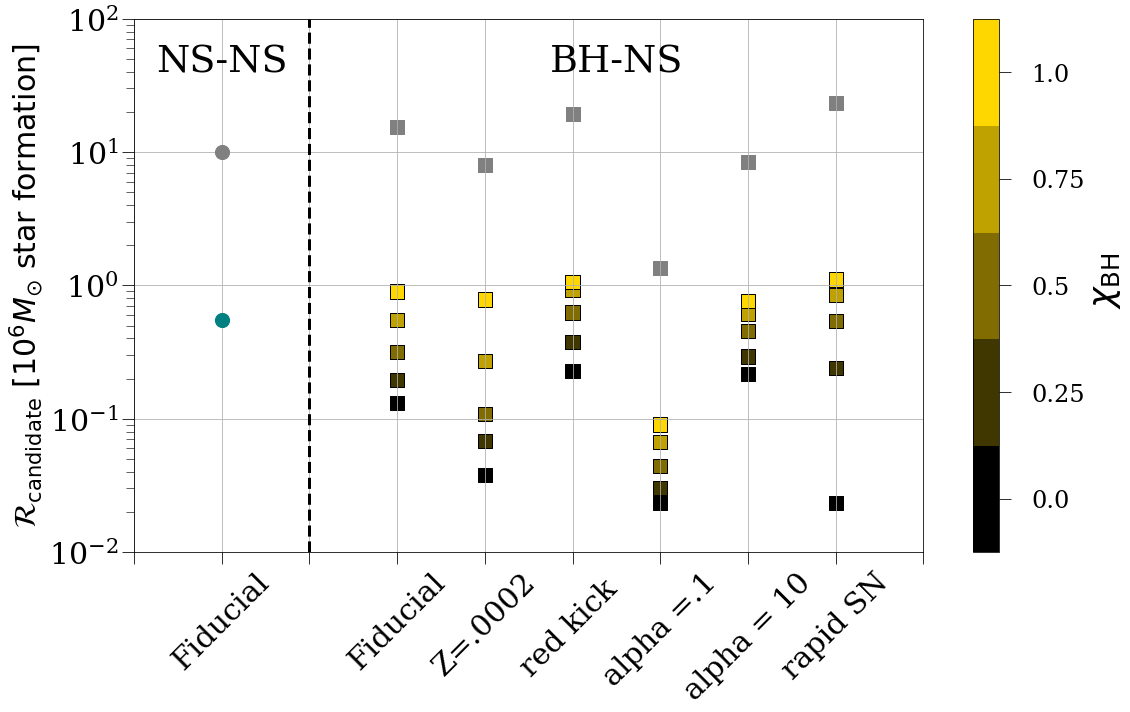

In [216]:
path = '/Volumes/TOSHIBA EXT/BHNSpaper19/'

UFDparameters = [0.1, 4.6] # [epsilon, Kpc Rvir radius of UFD galaxy ]  (See Mohammad et al. 2018)     epsilon = 0.1 // Floor double check

ModelNamesList = ['', 'Fiducial', '', 'Fiducial', 'Z=.0002', 'red kick ', 'alpha =.1', 'alpha = 10', 'rapid SN' ]



bhSpinValues = np.linspace(0.,1,5)
DirNames = [['BHNSZ0_002', 'BHNSZ0_0002', 'BHNSZ0_002_REDUCEDBHkick', 'BHNSZ0_002_alpha0_1', 'BHNSZ0_002_alpha10', 'BHNSZ0_002_RAPID' ], [ 'BNSZ0_002']]

axarr1 = PlotRateCandidatesXeff(pathname = path, directory_names = DirNames, names = ModelNamesList, UFDpar  = UFDparameters,  ListXbhValues = bhSpinValues, Rns = 13, EquivalentMassCOMPASsimulation =EquivalentMassCOMPAS_1E6binaries )
plt.savefig('/Users/fbro0003/Documents/git/popsynth/Papers/BroekgaardenEtAl/BHNSmergers/images/RateUFDEnrichingMergers2.png', dpi = 300)
plt.savefig('/Users/fbro0003/Documents/git/popsynth/Papers/BroekgaardenEtAl/BHNSmergers/images/RateUFDEnrichingMergers2.pdf')

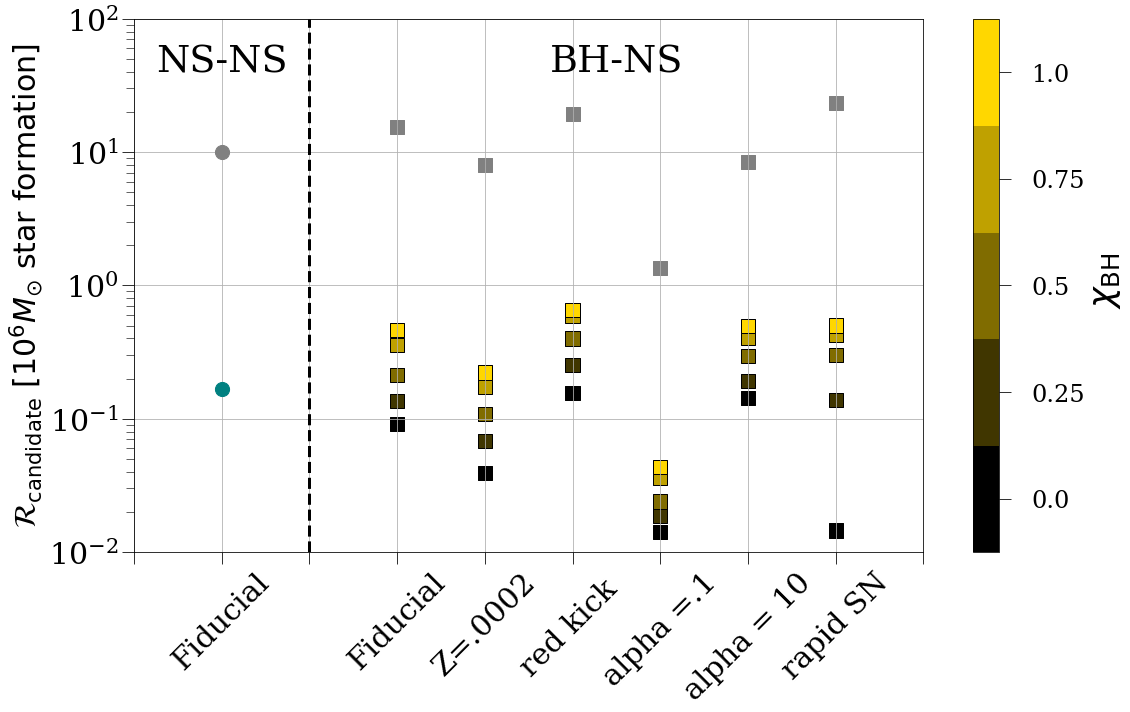

In [217]:
path = '/Volumes/TOSHIBA EXT/BHNSpaper19/'

UFDparameters = [0.1, 1.3] # [epsilon, Kpc Rvir radius of UFD galaxy ]  (See Mohammad et al. 2018)     epsilon = 0.1 // Floor double check

ModelNamesList = ['', 'Fiducial', '', 'Fiducial', 'Z=.0002', 'red kick ', 'alpha =.1', 'alpha = 10', 'rapid SN' ]



Xeffvalues = np.linspace(0.,1,5)
DirNames = [['BHNSZ0_002', 'BHNSZ0_0002', 'BHNSZ0_002_REDUCEDBHkick', 'BHNSZ0_002_alpha0_1', 'BHNSZ0_002_alpha10', 'BHNSZ0_002_RAPID' ], [ 'BNSZ0_002']]

axarr1 = PlotRateCandidatesXeff(pathname = path, directory_names = DirNames, names = ModelNamesList, UFDpar  = UFDparameters,  ListXbhValues = bhSpinValues, Rns = 13, EquivalentMassCOMPASsimulation =EquivalentMassCOMPAS_1E6binaries )
plt.savefig('/Users/fbro0003/Documents/git/popsynth/Papers/BroekgaardenEtAl/BHNSmergers/images/RateUFDEnrichingMergers2_Rvir1_3.png', dpi = 300)
plt.savefig('/Users/fbro0003/Documents/git/popsynth/Papers/BroekgaardenEtAl/BHNSmergers/images/RateUFDEnrichingMergers2_Rvir1_3.pdf')

In [211]:
def CalculateFormationRateTable(pathname, directory_names, names, UFDpar, ListXbhValues,  Rns, EquivalentMassCOMPASsimulation):
    
    
    '''  
    pathdisk = '/Volumes/TOSHIBA EXT/Stroopwafel2_0/' # path to directories with data 
    directory_names [['BHNSZ0_002', 'BHNSZ0_0002', 'BHNSZ0_002_REDUCEDBHkick'], [ 'BNSZ0_002']]
    UFDpar = [epsilon, Rvir] in [#,  kpc]
    boolDCOmask = [True, True, False]   # VALUE FOR = [Hubble, RLOF, Pessimistic]
    ListXbhValues = [Xbh0, Xbh1, Xbh2, .. Xbhn] list of values X spin parameter of black hole allowed 
    Rns = assumed radius of the NSs in [Rsun]
    EquivalentMassCOMPASsimulation = Equivalent mass of the COMPAS simulation run in [Msun]
    '''    
    
    # names = DirNames in [['BH-NS dir names'], ['NS-NS dir names']]

    # Constants 
#     SFR = 2.0 *10E6 #2.0*10**6 # [SFR] = Msol Myr^-1 # The continuous star formation rate \
    # assumed in a Milky Way like Galaxy (see e.g. Dominik 2012 or de Mink & Belczynski for reference)     
    
     

    ListBHNSdirectory, ListBNSdirectory = directory_names #
    nrBNSsimulations = len(ListBNSdirectory)
    

    
    
    
    ############.  BNS data #########
    for indBNSdirectory, BNSdirectory in enumerate(ListBNSdirectory):

        #OPTIMISTIC
        MsolMassPerCandidate, MsolMassPerAllMergers, NRbinaries, _ = CalculateRateEnrichingUFD(pathdisk = pathname, DCOtypeList =   ['BNS'], DirNameList =  [BNSdirectory], \
            boolDCOmask = [True, True, False], UFDpar = UFDpar, ListXbhValues = ListXbhValues,  Rns = Rns, EquivalentMassCOMPASsimulation = EquivalentMassCOMPASsimulation )
        
        nrDCO, nrCandidateDCO = NRbinaries
        
        RateMyrCandidate =  EquivalentMassCOMPASsimulation / MsolMassPerCandidate  #  COMPAS weight.  (1. / MsolMassPerCandidate)  * 1E6  #  [year^-1 SFR^-1 ]  # Myr EquivalentMassCOMPASsimulation / CandidateWeight
        RateMyrAll =  EquivalentMassCOMPASsimulation / MsolMassPerAllMergers #  COMPAS weight (1. / MsolMassPerAllMergers) * 1E6  #  [year^-1 SFR^-1 ] 
      
        
        print('rate all BNS = ', RateMyrAll, 'rate BNS Candidates ',  RateMyrCandidate, 'fraction =', RateMyrCandidate / RateMyrAll)
        print('Nr DCOs = ', nrDCO, 'nr Candidate = ', nrCandidateDCO)
        print()
#         axarr1.scatter(indBNSdirectory+1, RateMyrCandidate, s = 200, marker = 'o', c = 'teal', zorder = 3)
#         axarr1.scatter(indBNSdirectory+1, RateMyrAll      , s = 200, marker = 'o', c = 'gray', zorder = 3)



    
    
    ############.  BHNS data #########    
    for indBHNSdirectory, BHNSdirectory in enumerate(ListBHNSdirectory):

        
        #OPTIMISTIC
        MsolMassPerCandidate, MsolMassPerAllMergers, NRbinaries, ListFractionBHNSCandidatesDisrupted = CalculateRateEnrichingUFD(pathdisk = pathname, DCOtypeList =   ['BHNS'], DirNameList =  [BHNSdirectory], \
            boolDCOmask = [True, True, False], UFDpar = UFDpar, ListXbhValues = ListXbhValues,  Rns = Rns, EquivalentMassCOMPASsimulation = EquivalentMassCOMPASsimulation )   
        
        nrDCO, nrCandidateDCO = NRbinaries
        
        RateMyrCandidate =  EquivalentMassCOMPASsimulation / MsolMassPerCandidate  #  COMPAS weight.  (1. / MsolMassPerCandidate)  * 1E6  #  [year^-1 SFR^-1 ]  # Myr EquivalentMassCOMPASsimulation / CandidateWeight
        RateMyrAll =  EquivalentMassCOMPASsimulation / MsolMassPerAllMergers #  COMPAS weight (1. / MsolMassPerAllMergers) * 1E6  #  [year^-1 SFR^-1 ] 
        
        print('rate all BHNS = ', RateMyrAll, 'rate BHNS Candidates ',  RateMyrCandidate *  ListFractionBHNSCandidatesDisrupted, 'fraction =', RateMyrCandidate / RateMyrAll)
        print('Nr DCOs = ', nrDCO, 'nr Candidate = ', nrCandidateDCO)
        print('for Xeff = ', ListXbhValues)
        print()
#         axarr1.scatter([indBHNSdirectory + nrBNSsimulations +2]*len(ListFractionBHNSCandidatesDisrupted), RateMyrCandidate * ListFractionBHNSCandidatesDisrupted ,\
#                        s = 200, marker = 's',  c = ListXbhValues, cmap = cmapCustom, edgecolor='black', linewidth=1 )

#         axarr1.scatter(indBHNSdirectory + nrBNSsimulations +2, RateMyrAll , s = 200, marker = 's', c = 'gray' )
 
path = '/Volumes/TOSHIBA EXT/BHNSpaper19/'

UFDparameters = [0.1, 4.6] # [epsilon, Kpc Rvir radius of UFD galaxy ]  (See Mohammad et al. 2018)     epsilon = 0.1 // Floor double check

ModelNamesList = ['', 'Fiducial', '', 'Fiducial', 'Z=.0002', 'red kick ', 'alpha =.1', 'alpha = 10', 'rapid SN' ]



Xeffvalues = np.linspace(0,1,3)
DirNames = [['BHNSZ0_002', 'BHNSZ0_0002', 'BHNSZ0_002_REDUCEDBHkick', 'BHNSZ0_002_alpha0_1', 'BHNSZ0_002_alpha10', 'BHNSZ0_002_RAPID' ], [ 'BNSZ0_002']]

CalculateFormationRateTable(pathname = path, directory_names = DirNames, names = ModelNamesList, UFDpar  = UFDparameters,  \
                            ListXbhValues = Xeffvalues, Rns = 13, EquivalentMassCOMPASsimulation =EquivalentMassCOMPAS_1E6binaries )



print('----------------------------------------------')
print('smaller UFD')


UFDparameters = [0.1, 1.3] # [epsilon, Kpc Rvir radius of UFD galaxy ]  (See Mohammad et al. 2018)     epsilon = 0.1 // Floor double check
CalculateFormationRateTable(pathname = path, directory_names = DirNames, names = ModelNamesList, UFDpar  = UFDparameters,  \
                            ListXbhValues =Xeffvalues, Rns = 13, EquivalentMassCOMPASsimulation =EquivalentMassCOMPAS_1E6binaries )


    

In [206]:
np.linspace(0,1,3)

array([0. , 0.5, 1. ])

In [212]:
path = '/Volumes/TOSHIBA EXT/BHNSpaper19/'

UFDparameters = [0.1, 4.6] # [epsilon, Kpc Rvir radius of UFD galaxy ]  (See Mohammad et al. 2018)     epsilon = 0.1 // Floor double check

ModelNamesList = ['', 'Fiducial', '', 'Fiducial', 'Z=.0002', 'red kick ', 'alpha =.1', 'alpha = 10', 'rapid SN' ]



Xeffvalues = np.linspace(0,1,3)
DirNames = [['BHNSZ0_002', 'BHNSZ0_0002', 'BHNSZ0_002_REDUCEDBHkick', 'BHNSZ0_002_alpha0_1', 'BHNSZ0_002_alpha10', 'BHNSZ0_002_RAPID' ], [ 'BNSZ0_002']]

CalculateFormationRateTable(pathname = path, directory_names = DirNames, names = ModelNamesList, UFDpar  = UFDparameters,  \
                            ListXbhValues = Xeffvalues, Rns = 13, EquivalentMassCOMPASsimulation =EquivalentMassCOMPAS_1E6binaries )



print('----------------------------------------------')
print('smaller UFD')


UFDparameters = [0.1, 1.3] # [epsilon, Kpc Rvir radius of UFD galaxy ]  (See Mohammad et al. 2018)     epsilon = 0.1 // Floor double check
CalculateFormationRateTable(pathname = path, directory_names = DirNames, names = ModelNamesList, UFDpar  = UFDparameters,  \
                            ListXbhValues =Xeffvalues, Rns = 13, EquivalentMassCOMPASsimulation =EquivalentMassCOMPAS_1E6binaries )



rate all BNS =  643.8764761173088 rate BNS Candidates  35.291974611179505 fraction = 0.05481171609808837
Nr DCOs =  27688 nr Candidate =  811

rate all BHNS =  1000.3715532320093 rate BHNS Candidates  [ 8.46500923 20.47278158 58.25180426] fraction = 0.058230168654162
Nr DCOs =  39753 nr Candidate =  1858
for Xeff =  [0.  0.5 1. ]

rate all BHNS =  516.6387174467002 rate BHNS Candidates  [ 2.4604179   7.04098314 50.72648819] fraction = 0.09818561110767293
Nr DCOs =  21930 nr Candidate =  1938
for Xeff =  [0.  0.5 1. ]

rate all BHNS =  1239.7900541345307 rate BHNS Candidates  [14.81231734 40.47081239 68.6924589 ] fraction = 0.05540652522090523
Nr DCOs =  51442 nr Candidate =  2546
for Xeff =  [0.  0.5 1. ]

rate all BHNS =  86.76506273706939 rate BHNS Candidates  [1.50229617 2.85436272 5.85895507] fraction = 0.06752666201393981
Nr DCOs =  1487 nr Candidate =  117
for Xeff =  [0.  0.5 1. ]

rate all BHNS =  540.530330647645 rate BHNS Candidates  [14.03613928 29.30950665 49.10515597] frac

In [178]:
# path = '/Volumes/TOSHIBA EXT/Stroopwafel2_0/'



def PlotDistanceTraveled(globpar, UFDpar, Xeffvalue, EquivalentMassCOMPASsimulation): # Xeffvalues):  directory_names, 
    # names = DirNames in [['BH-NS dir names'], ['NS-NS dir names']]
    
    # Constants 
    KpcToKM = 3.086 * 10**(16) # kpc to km  
    MyrToYr = 1E6 # yrs
    YrToSec = 3.154 *1E7 #sec

    SFR = 2.0*10**6 # [SFR] = Msol Myr^-1 # The continuous star formation rate \
    # assumed in a Milky Way like Galaxy (see e.g. Dominik 2012 or de Mink & Belczynski for reference)  
#     # Convert this to a MW like galaxy  for 10 Gyr age
#     MWEGStarFormation=10*(10**3)*SFR  
#     NbinariesCOMPAS = 1E6 
    
    colors = ['teal', 'gold']
    
    pathdisk, DCOtypeList, DirNameList, ListDCOmask = globpar
#     globpar = [pathdisk, DCOtypeList, DirNameList, boolDCOmask]
    UFDepsilon, UFDrvir = UFDpar    
    
    f, (axarr1) = plt.subplots(1, 1,  figsize=(16,10))   
     
    radiusUFDgalaxy = UFDepsilon * UFDrvir * KpcToKM   # enriching radius in km     
    radiusUFDgalaxy2 = UFDepsilon * 1.3 * KpcToKM   # km         
    d_max2 = 1E3 * radiusUFDgalaxy2 / KpcToKM  
    d_max1 = 1E3 * radiusUFDgalaxy / KpcToKM   
    ############.  BNS data #########
    for ii, _ in enumerate(DCOtypeList): 
        
        tc,  DCOweights = obtainDataSTROOPWAFEL(i = ii,  param = ['tc', 'doubleCompactObjects'], global_param = globpar)
        # obtain systematic velocity of binary in [km/s]
        vsys, _ = obtainDataSTROOPWAFEL(i = ii, param = ['systemicVelocity', 'supernovae'], global_param = globpar)
        ## SN are double since we have 2 SN per merging system. But 1st SN is always primary, and 2nd seconday, we only need one vsys
        vsys = vsys[1:][::2]

        # determine which DCO systems are candidate for enriching UFD galaxies:
        traveldistance = tc * vsys *  MyrToYr * YrToSec  # this is in km 
        
        maskCandidates = (traveldistance <= radiusUFDgalaxy) # the DCO is a candidate if it merges before travelling outside of the galaxy
        

        maskCandidates2 = (traveldistance <= radiusUFDgalaxy2)
        
        
        if DCOtypeList[ii] == 'BHNS':
            m1 , _ = obtainDataSTROOPWAFEL(i = ii, param = ['M1', 'doubleCompactObjects'], global_param = globpar)
            m2 , _ = obtainDataSTROOPWAFEL(i = ii, param = ['M2', 'doubleCompactObjects'], global_param = globpar)
            
            r_ns = np.asarray([13]*len(m1)) # radius in Rsun
            
            
            m1bh, m2ns = obtainM1BHandM2BHassymetric(m1, m2)
            
            
            Mejected = calculateEjectedMassMerger(m2ns, r_ns, m1bh, Xeffvalue)
            MejectedXbh0 = calculateEjectedMassMerger(m2ns, r_ns, m1bh, 0)
            
            
            maskCandidatesBHNSDisrupted = (traveldistance <= radiusUFDgalaxy) & (Mejected > 0)
#             maskCandidatesBHNSnotDisrupted2 = (traveldistance <= radiusUFDgalaxy2) & (Mejected > 0)
            maskCandidatesBHNSDisruptedXbh0 = (traveldistance <= radiusUFDgalaxy2) & (MejectedXbh0 > 0)
            
            
            
            fractionBHNSCandidatesDisrupted = np.sum(maskCandidatesBHNSDisrupted) / np.sum(maskCandidates)
            # overwrite mask 
            maskCandidates = maskCandidatesBHNSDisrupted
            
#             if pdf == True:
#                 # Xbh = 0 
#                 axarr1.hist(((traveldistance[maskCandidatesBHNSDisruptedXbh0] ) * (1E3/ KpcToKM)), bins  = BINS,  weights =  DCOweights[maskCandidatesBHNSDisruptedXbh0], \
#                     facecolor = 'gold', lw = 3, histtype = 'stepfilled',   zorder = 300, edgecolor='black', linewidth=5,\
#                             label = 'BHNS Xbh = 0', alpha = 0.3, hatch = '/')            
#             maskCandidates2 = maskCandidatesBHNSnotDisrupted2
        weightsAstroUnits = ((DCOweights ) / EquivalentMassCOMPASsimulation ) *1E6  # Per Myr per SFR 
        factorPlot = ((1) / EquivalentMassCOMPASsimulation ) *1E6
        if pdf == True:
            BINS = np.linspace(0, d_max1, 30)
            
            
            axarr1.hist(((traveldistance[maskCandidates] ) * (1E3/ KpcToKM)), bins  = BINS,  weights =  weightsAstroUnits[maskCandidates] , \
                    color = colors[ii], lw = 3, histtype = 'stepfilled', label = DCOtypeListLabel[ii], alpha = 0.6, zorder = 30, edgecolor='black', linewidth=5)
#             axarr1.hist(((traveldistance[maskCandidates2] ) * (1E3/ KpcToKM)), bins  = BINS,  weights =  DCOweights[maskCandidates2], \
#                     color = colors[ii], lw = 3, histtype = 'stepfilled',  alpha = 1)
            
            axarr1.set_ylabel(r'$\rm{Rate} \ \mathcal{R}_{\rm{Candidate}} \ [10^6 M_{\odot} \ \rm{star} \ \rm{formation}]  $' , fontsize = fs)
            axarr1.set_xlabel(r'$\, \rm{Traveled} \ \rm{distance}  \ [\rm{pc}]$', fontsize = fs)    
            arrowlocation = np.asarray([-1, 1,3,5,7,9]) * factorPlot
            yloc_text = 6.15 * factorPlot
            yloc_text2 = 2.15 * factorPlot
   
                
        else:
            
            axarr1.hist(((traveldistance[maskCandidates] ) * (1E3/ KpcToKM)), bins  = 30,  weights =  weightsAstroUnits[maskCandidates], \
                    color = colors[ii], lw = 5, histtype = 'step', label = DCOtypeListLabel[ii], alpha = 0.7, cumulative=True, zorder = 30)

            axarr1.set_ylabel(r'$\rm{Rate} \ \mathcal{R}_{\rm{Candidate}} \ [10^6 M_{\odot} \ \rm{star} \ \rm{formation}]  $' , fontsize = fs)
            axarr1.set_xlabel(r'$\, \rm{Traveled} \ \rm{distance}  \ [\rm{pc}]$', fontsize = fs)
            arrowlocation = np.asarray([-1, 5,15,25, 35, 45, 55, 65]) *factorPlot
            yloc_text = 36*factorPlot
            yloc_text2 = 1*factorPlot
            
            
    axarr1.legend(fontsize = fs, loc = 'upper center')
    axarr1.tick_params(labelsize=fs/2)
    axarr1.ticklabel_format(style = 'sci', axis = 'both')

    axarr1.set_xlabel(r'$\, \rm{Traveled} \ \rm{distance}  \ [\rm{pc}]$', fontsize = fs)
    axarr1.grid(True)
    axarr1.tick_params(labelsize=fs)

    

    
#     axarr1.plot([d_max2, d_max2], [-1,9] , color = 'gray', lw = 5, linestyle = ':')
    axarr1.errorbar([d_max2]*len(arrowlocation), arrowlocation , xerr=10, xuplims=True, lw = 5, color = 'gray', linestyle = ':', elinewidth =5, capsize = 10, zorder = 1) #xuplims=upperlimits, xlolims=lowerlimits)
    axarr1.fill_betweenx([0,50], 1, d_max2, zorder = 1, color = 'gray', alpha = 0.1, hatch='\\')
    
    axarr1.errorbar([d_max1]*len(arrowlocation), arrowlocation , xerr=10, xuplims=True, lw = 5, color = 'gray', linestyle = ':', elinewidth =5, capsize = 10, zorder = 1) #xuplims=upperlimits, xlolims=lowerlimits)
    axarr1.fill_betweenx([0,50], d_max2, d_max1, zorder = 0, alpha = 0.1, hatch='', facecolor="none")
    
    axarr1.set_xlim(0, 500)
#     axarr1.text(d_max1+6, arrowlocation[4], r"merges inside "  + r"$r_{\rm{vir}} \approx 1.3 \ \rm{kpc} $ halo", rotation = 90, fontsize = fs-10, color = 'k')#, weight = 'bold')
#     axarr1.text(d_max2+6, arrowlocation[4], r"merges inside " + r"$r_{\rm{vir}} \approx 4.6 \ \rm{kpc} $ halo", rotation = 90, fontsize = fs-10, color = 'k')#, weight = 'bold')
    
    
    axarr1.text(30, yloc_text, r"merges inside " + "\n" + r"$r_{\rm{vir}} \approx 1.3 \ \rm{kpc} $ halo", rotation = 0, fontsize = fs-10, color = 'k')#, weight = 'bold')
    axarr1.text(360,yloc_text, r"merges inside " + "\n" + r"$r_{\rm{vir}} \approx 4.6 \ \rm{kpc} $ halo", rotation = 0, fontsize = fs-10, color = 'k')#, weight = 'bold')

#     axarr1.text(320, yloc_text2, r"$\chi_{\rm{BH}} = $" + str(Xeffvalue) , rotation = 0, fontsize = fs+8, color = 'k')#, weight = 'bold')
    
#     plt.xticks(range(len(ListBNSdirectory)+len(ListBHNSdirectory)+2), names, rotation=45)
    plt.tight_layout()
    if pdf == True:
        axarr1.set_ylim(0, 8.5*factorPlot)
#         axarr1.set_ylabel(r'$\rm{Rate} \ \mathcal{R}_{\rm{Candidate}} \ [\rm{}] $' , fontsize = fs) #[\rm{Myr}^{-1} \ \rm{MWEG}^{-1}] 

        
    else: 
        axarr1.set_ylim(0, 40*factorPlot)


#     plt.show()  
    return axarr1
    
    
    




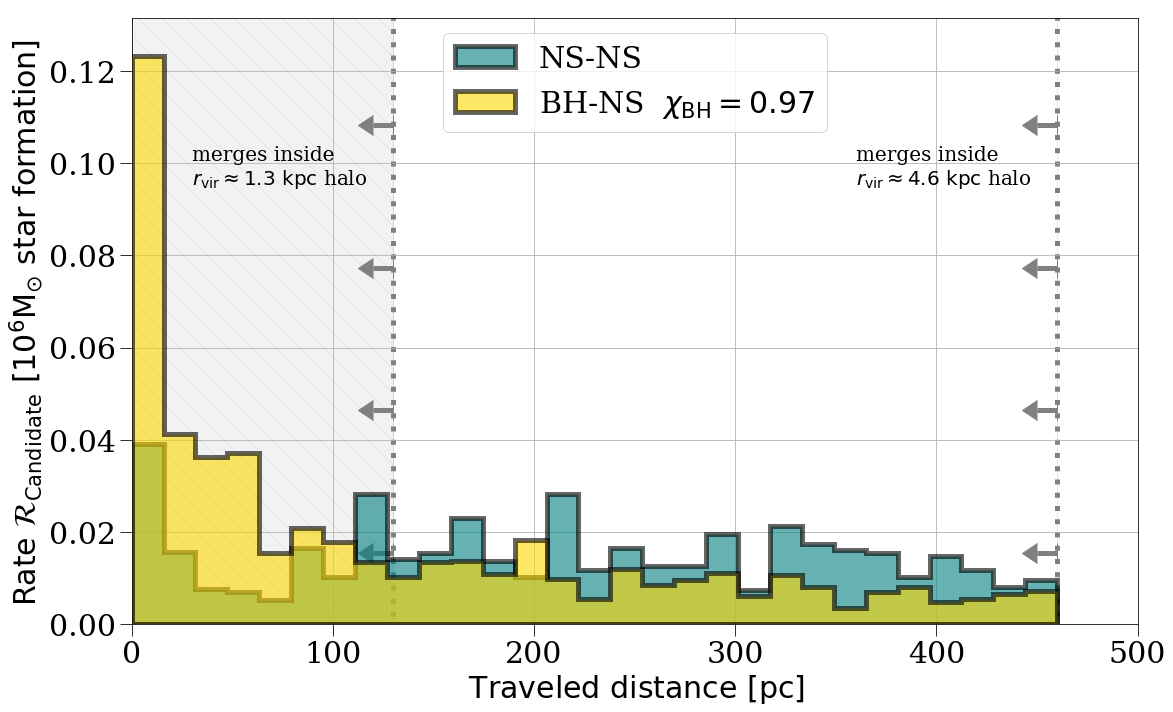

In [179]:
matplotlib.rcParams['hatch.linewidth'] = 1.0
DCOtypeListLabel = ['NS-NS', r'BH-NS  $\chi_{\rm{BH}}= 0.97 $']
path = '/Volumes/TOSHIBA EXT/BHNSpaper19/'
pdf = True

globpar = [path, ['BNS', 'BHNS'], ['BNSZ0_002', 'BHNSZ0_002'], ['True', 'True', 'False']]
UFDparameters = [0.1, 4.6] # 
axarr1 = PlotDistanceTraveled(globpar, UFDparameters, Xeffvalue = 0.97, EquivalentMassCOMPASsimulation = EquivalentMassCOMPAS_1E6binaries ) 
plt.savefig('/Users/fbro0003/Documents/git/popsynth/Papers/BroekgaardenEtAl/BHNSmergers/images/traveldistancePDF_Xeff0_97.png', dpi = 300)
plt.savefig('/Users/fbro0003/Documents/git/popsynth/Papers/BroekgaardenEtAl/BHNSmergers/images/traveldistancePDF_Xeff0_97.pdf')

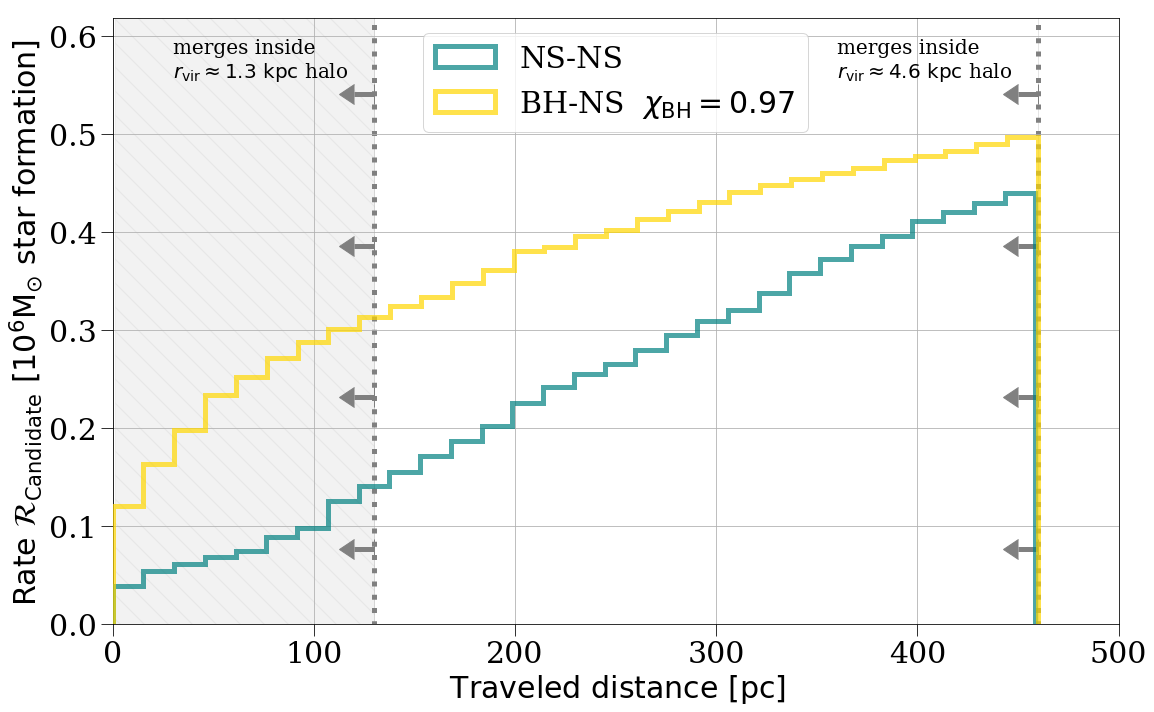

In [181]:
path = '/Volumes/TOSHIBA EXT/BHNSpaper19/'
pdf = False 
DCOtypeListLabel = ['NS-NS', r'BH-NS  $\chi_{\rm{BH}}= 0.97 $']
globpar = [path, ['BNS', 'BHNS'], ['BNSZ0_002', 'BHNSZ0_002'], ['True', 'True', 'False']]
UFDparameters = [0.1, 4.6] # 
axarr1 = PlotDistanceTraveled(globpar, UFDparameters, Xeffvalue=0.97, EquivalentMassCOMPASsimulation = EquivalentMassCOMPAS_1E6binaries) 
plt.savefig('/Users/fbro0003/Documents/git/popsynth/Papers/BroekgaardenEtAl/BHNSmergers/images/traveldistanceCDF_Xeff0_97.png', dpi = 300)
plt.savefig('/Users/fbro0003/Documents/git/popsynth/Papers/BroekgaardenEtAl/BHNSmergers/images/traveldistanceCDF_Xeff0_97.pdf')

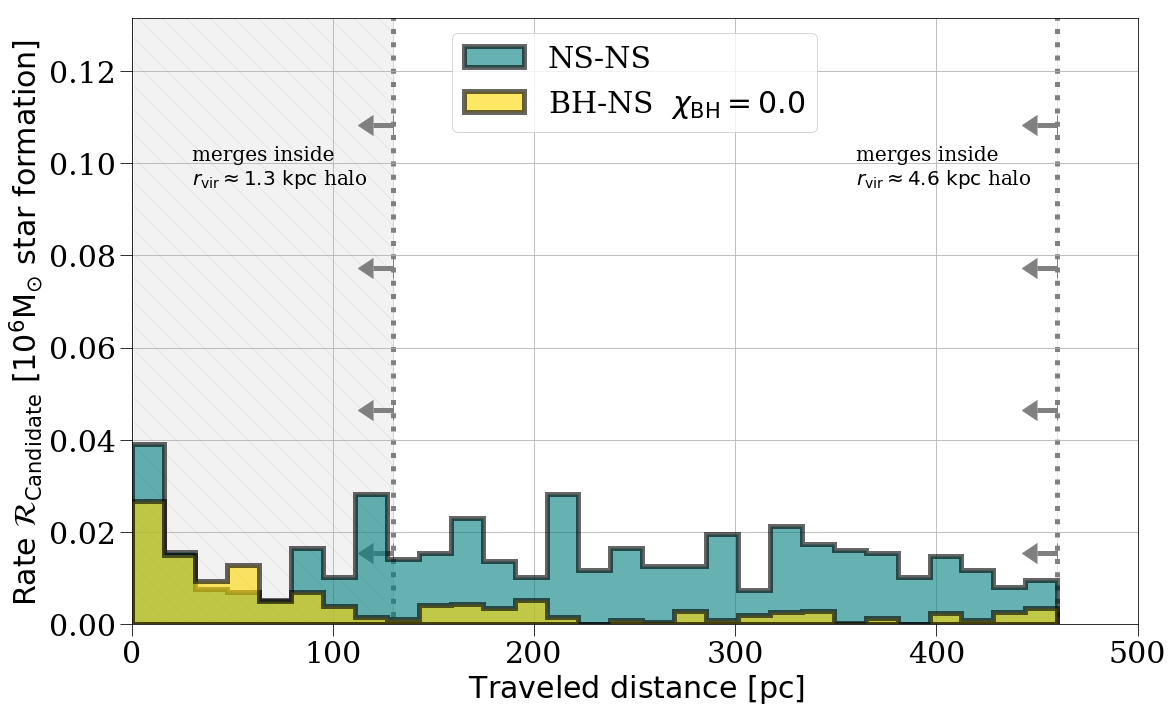

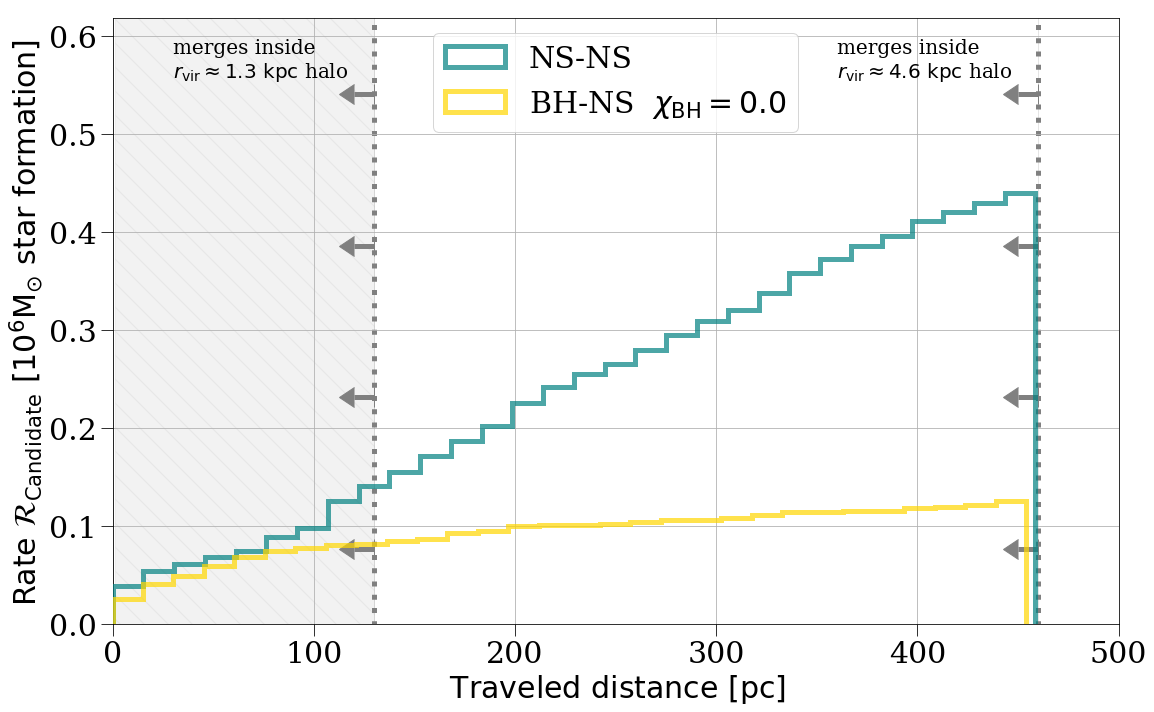

In [182]:

path = '/Volumes/TOSHIBA EXT/BHNSpaper19/'
DCOtypeListLabel = ['NS-NS', r'BH-NS  $\chi_{\rm{BH}}= 0$']
globpar = [path, ['BNS', 'BHNS'], ['BNSZ0_002', 'BHNSZ0_002'], ['True', 'True', 'False']]
UFDparameters = [0.1, 4.6] # 
DCOtypeListLabel = ['NS-NS', r'BH-NS  $\chi_{\rm{BH}}= 0.0 $']
pdf = True
axarr1 = PlotDistanceTraveled(globpar, UFDparameters, Xeffvalue = 0., EquivalentMassCOMPASsimulation = EquivalentMassCOMPAS_1E6binaries) 
plt.savefig('/Users/fbro0003/Documents/git/popsynth/Papers/BroekgaardenEtAl/BHNSmergers/images/traveldistancePDF_Xeff0_0.png', dpi = 300)
plt.savefig('/Users/fbro0003/Documents/git/popsynth/Papers/BroekgaardenEtAl/BHNSmergers/images/traveldistancePDF_Xeff0_0.pdf')

pdf = False
axarr1 = PlotDistanceTraveled(globpar, UFDparameters, Xeffvalue = 0., EquivalentMassCOMPASsimulation = EquivalentMassCOMPAS_1E6binaries) 
plt.savefig('/Users/fbro0003/Documents/git/popsynth/Papers/BroekgaardenEtAl/BHNSmergers/images/traveldistanceCDF_Xeff0_0.png', dpi = 300)
plt.savefig('/Users/fbro0003/Documents/git/popsynth/Papers/BroekgaardenEtAl/BHNSmergers/images/traveldistanceCDF_Xeff0_0.pdf')

In [196]:
# path = '/Volumes/TOSHIBA EXT/Stroopwafel2_0/'



def PlotDistanceTraveledTemp(globpar, UFDpar, xparam, XBHvalue, EquivalentMassCOMPASsimulation): # Xeffvalues):  directory_names, 
    KpcToKM = 3.086 * 10**(16) # kpc to km  
    MyrToYr = 1E6 # yrs
    YrToSec = 3.154 *1E7 #sec

    SFR = 2.0*10**6 # [SFR] = Msol Myr^-1 # The continuous star formation rate \
    # assumed in a Milky Way like Galaxy (see e.g. Dominik 2012 or de Mink & Belczynski for reference)  
    
    colors = ['teal', 'gold']
    
    pathdisk, DCOtypeList, DirNameList, ListDCOmask = globpar
#     globpar = [pathdisk, DCOtypeList, DirNameList, boolDCOmask]
    UFDepsilon, UFDrvir = UFDpar    
    
    f, (axarr1) = plt.subplots(1, 1,  figsize=(16,10))   
    
    xparam_header, xparam_filename, xparam_label = xparam
    ############.  BNS data #########
    for ii, _ in enumerate(DCOtypeList): 
        
        tc,  DCOweights = obtainDataSTROOPWAFEL(i = ii,  param = ['tc', 'doubleCompactObjects'], global_param = globpar)
        # obtain systematic velocity of binary in [km/s]
        vsys, _ = obtainDataSTROOPWAFEL(i = ii, param = ['systemicVelocity', 'supernovae'], global_param = globpar)
        ## SN are double since we have 2 SN per merging system. But 1st SN is always primary, and 2nd seconday, we only need one vsys
        vsys = vsys[0:][::2]

        # determine which DCO systems are candidate for enriching UFD galaxies:
        traveldistance = tc * vsys *  MyrToYr * YrToSec  # this is in km 
        radiusUFDgalaxy = UFDepsilon * UFDrvir * KpcToKM   # enriching radius in km 
        maskCandidates = (traveldistance <= radiusUFDgalaxy) # the DCO is a candidate if it merges before travelling outside of the galaxy


        
        
        if DCOtypeList[ii] == 'BHNS':
            m1 , _ = obtainDataSTROOPWAFEL(i = ii, param = ['M1', 'doubleCompactObjects'], global_param = globpar)
            m2 , _ = obtainDataSTROOPWAFEL(i = ii, param = ['M2', 'doubleCompactObjects'], global_param = globpar)
            
            r_ns = np.asarray([13]*len(m1)) # radius in Rsun
            
            
            m1bh, m2ns = obtainM1BHandM2BHassymetric(m1, m2)
            
            
#             ListFractionBHNSCandidatesDisrupted = np.zeros_like(ListXeff)
#             for  Xeff in enumerate(ListXeff):
            Mejected = calculateEjectedMassMerger(m2ns, r_ns, m1bh, XBHvalue)
            MejectedXbh0 = calculateEjectedMassMerger(m2ns, r_ns, m1bh, 0)
        
            maskCandidatesBHNSnotDisrupted = (traveldistance <= radiusUFDgalaxy) & (Mejected > 0)
            maskCandidatesBHNSnotDisruptedXbh0 = (traveldistance <= radiusUFDgalaxy) & (MejectedXbh0 > 0)
            
            fractionBHNSCandidatesDisrupted = np.sum(maskCandidatesBHNSnotDisrupted) / np.sum(maskCandidates)
#             ListFractionBHNSCandidatesDisrupted[indXeff] = fractionBHNSCandidatesDisrupted        
            maskCandidates = maskCandidatesBHNSnotDisrupted
            maskCandidatesXbh0 = maskCandidatesBHNSnotDisruptedXbh0
        

        
        xparam,  _ = obtainDataSTROOPWAFEL(i = ii,  param = [xparam_header, xparam_filename], global_param = globpar)

        factorPlot = ((1) / EquivalentMassCOMPASsimulation ) *1E6 
     
        
        if xparam_filename == 'supernovae':
            xparam = xparam[1:][::2]
        if DCOtypeList[ii] == 'BHNS':
            axarr1.hist(np.log10(xparam[maskCandidatesXbh0]), bins  = BINS,  weights =  DCOweights[maskCandidatesXbh0]*factorPlot, facecolor = 'white',  lw = 3,\
            histtype = 'stepfilled', density = 0, label = r'BH-NS $\chi_{\rm{bh}} = 0$', alpha = 0.7, edgecolor='black', linewidth=5, hatch = '/', zorder = 100) 
            
        axarr1.hist(np.log10(xparam[maskCandidates]), bins  = BINS,  weights =  DCOweights[maskCandidates]*factorPlot, color = colors[ii], lw = 3,\
                    histtype = 'stepfilled', density = 0, label = LabelsList[ii], alpha = 0.7, edgecolor='black', linewidth=5)
  
        
        
        flagECSN,  _ = obtainDataSTROOPWAFEL(i = ii,  param = ['flagECSN', 'supernovae'], global_param = globpar)
        flagECSN1 = flagECSN[0:][::2]
        flagECSN2 = flagECSN[1:][::2]
        
        maskECSN1 = (flagECSN1[maskCandidates] == 1 )  
        maskECSN2 = (flagECSN2[maskCandidates] == 1 )
        
        flagECSN1 = flagECSN[0:][::2]
        flagECSN2 = flagECSN[1:][::2]
        
        maskECSN1 = (flagECSN1[maskCandidates] == 1 )  
        maskECSN2 = (flagECSN2[maskCandidates] == 1 )

        
        
        
        flagUSSN,  _ = obtainDataSTROOPWAFEL(i = ii,  param = ['flagUSSN', 'supernovae'], global_param = globpar)
        flagUSSN1 = flagECSN[0:][::2]
        flagUSSN2 = flagECSN[1:][::2]
        
        maskUSSN1 = (flagUSSN1[maskCandidates] == 1 )  
        maskUSSN2 = (flagUSSN2[maskCandidates] == 1 )
        
        flagUSSN1 = flagUSSN[0:][::2]
        flagUSSN2 = flagUSSN[1:][::2]
        
        maskUSSN1 = (flagUSSN1[maskCandidates] == 1 )  
        maskUSSN2 = (flagUSSN2[maskCandidates] == 1 )        
        
        
        
        print(np.sum(maskECSN1), np.sum(maskECSN2), 'nr of ECSN among Candidates SN1, SN2 ', len(maskECSN1))
        print(np.sum(maskUSSN1), np.sum(maskUSSN2), 'nr of USSN among Candidates SN1, SN2 ', len(maskECSN1))
        
        #         print('labeling this as = ', DCOtypeList[ii])
        
#         if xparam_header == 'flagECSN':
#             axarr1.hist((xparam[maskCandidates]), bins  = 30,  weights =  DCOweights[maskCandidates], color = colors[ii], lw = 3,\
#                     histtype = 'stepfilled', density = True, label = DCOtypeList[ii], alpha = 0.7)
    axarr1.legend(fontsize = fs, loc = "upper left")
    axarr1.set_xlabel(xparam_label[0] , fontsize = fs)
    axarr1.set_ylabel(xparam_label[1], fontsize = fs)
    
    axarr1.tick_params(labelsize=fs/2)
    axarr1.ticklabel_format(style = 'sci', axis = 'both')
    axarr1.grid(True)
    axarr1.tick_params(labelsize=fs)
    
    return axarr1
#     plt.xticks(range(len(ListBNSdirectory)+len(ListBHNSdirectory)+2), names, rotation=45)
#     plt.tight_layout()
#     plt.show()  

    
    



2296 0 nr of ECSN among Candidates SN1, SN2  3504
0 3386 nr of USSN among Candidates SN1, SN2  3504
0 0 nr of ECSN among Candidates SN1, SN2  3108
0 32 nr of USSN among Candidates SN1, SN2  3108


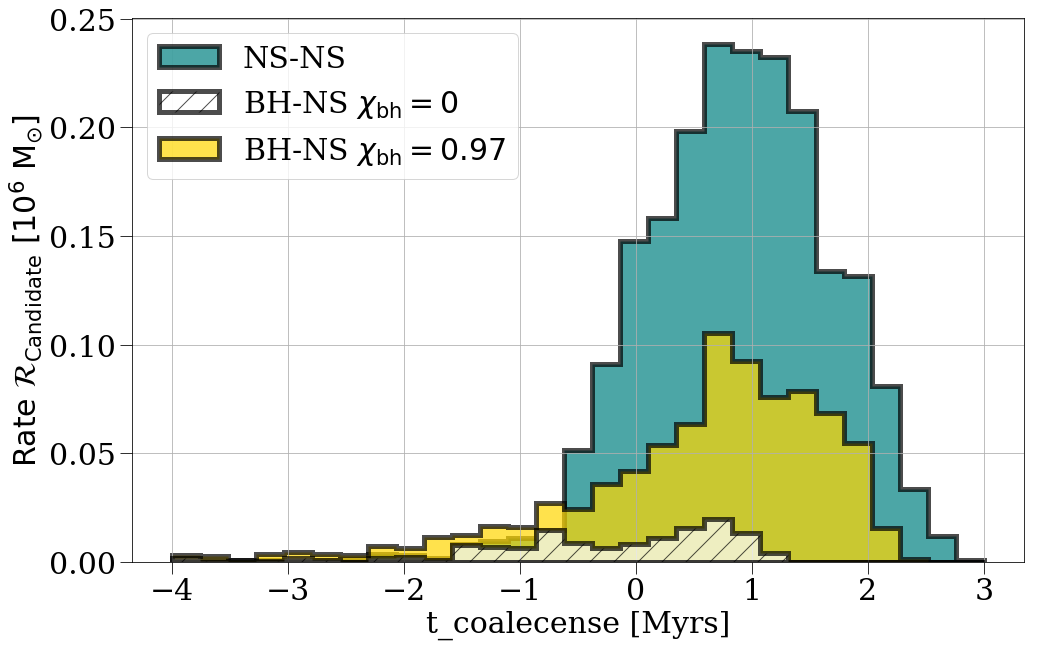

In [197]:
loc_images = '/Users/fbro0003/Documents/git/popsynth/Papers/BroekgaardenEtAl/BHNSmergers/images/'
# f, (axarr1) = plt.subplots(1, 1,  figsize=(16,10)) 
xparam = ['tc', 'doubleCompactObjects' , [r't_coalecense [Myrs]', r'$\rm{Rate} \ \mathcal{R}_{\rm{Candidate}} \ [10^6 \ \rm{M}_{\odot} ] $']] 
LabelsList = [r'NS-NS', r'BH-NS $\chi_{\rm{bh}} = 0.97$']
XBHvalue = 0.97
BINS  = np.linspace(-4,3,30)
axarr1 = PlotDistanceTraveledTemp(globpar, UFDparameters, xparam = xparam, XBHvalue = XBHvalue, EquivalentMassCOMPASsimulation = EquivalentMassCOMPAS_1E6binaries) 

plt.savefig(loc_images + 'tcoalescencePDF.png', dpi = 300)
plt.savefig(loc_images + 'tcoalescencePDF.pdf')

2296 0 nr of ECSN among Candidates SN1, SN2  3504
0 3386 nr of USSN among Candidates SN1, SN2  3504
0 0 nr of ECSN among Candidates SN1, SN2  3108
0 32 nr of USSN among Candidates SN1, SN2  3108


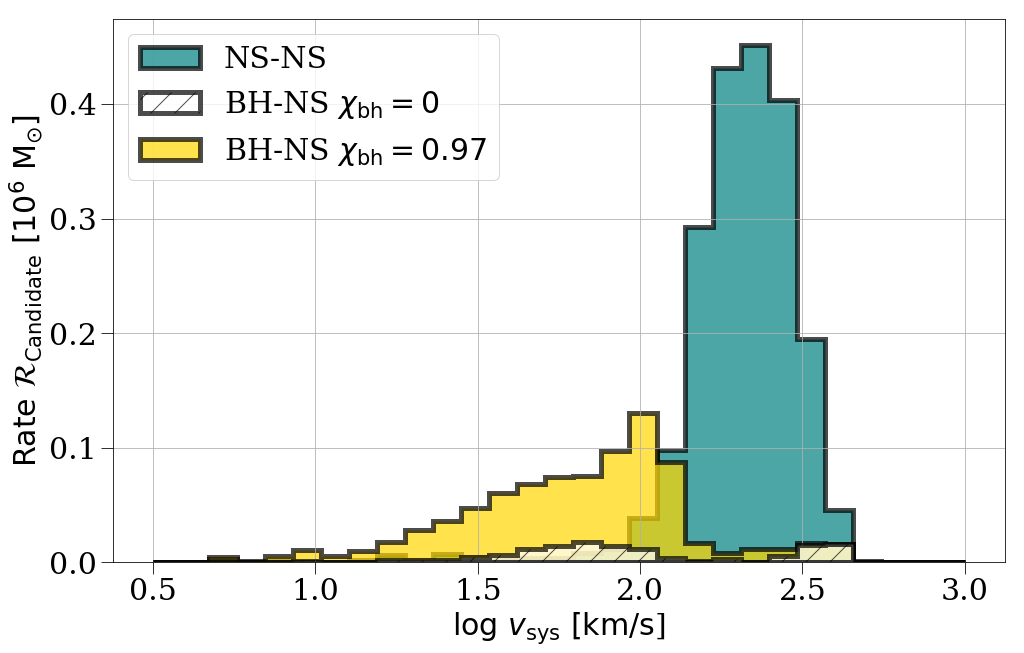

In [198]:
xparam = ['systemicVelocity', 'supernovae' , [r'$\log \ v_{\rm{sys}} \ [\rm{km/s}$]', r'$\rm{Rate} \ \mathcal{R}_{\rm{Candidate}} \ [10^6 \ M_{\odot} ] $']] 
XBHvalue = 0.97
BINS = np.linspace(0.5, 3, 30)
axarr1 = PlotDistanceTraveledTemp(globpar, UFDparameters, xparam = xparam, XBHvalue=XBHvalue, EquivalentMassCOMPASsimulation = EquivalentMassCOMPAS_1E6binaries)
plt.savefig(loc_images + 'tsystematicPDF.png', dpi = 300)
plt.savefig(loc_images + 'tsystematicPDF.pdf')

2296 0 nr of ECSN among Candidates SN1, SN2  3504
0 3386 nr of USSN among Candidates SN1, SN2  3504
0 0 nr of ECSN among Candidates SN1, SN2  3108
0 32 nr of USSN among Candidates SN1, SN2  3108


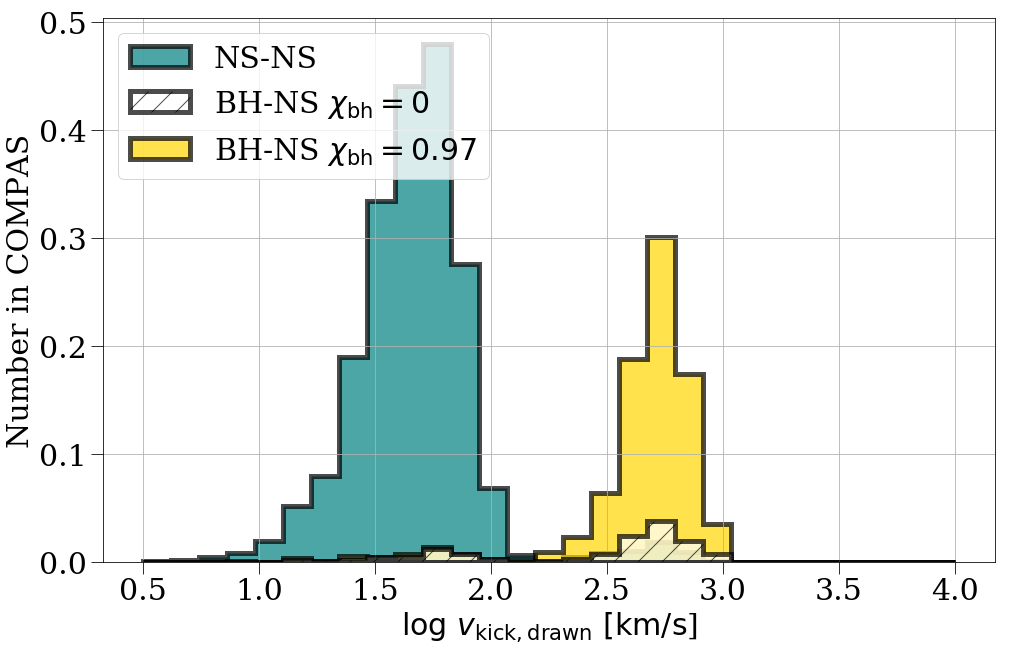

In [199]:
xparam = ['drawnKickVelocity', 'supernovae' , [r'$\log \ v_{\rm{kick, drawn}} \ [\rm{km/s}$]', 'Number in COMPAS']] 


BINS = np.linspace(0.5, 4, 30)
axarr1 = PlotDistanceTraveledTemp(globpar, UFDparameters, xparam = xparam, XBHvalue=XBHvalue, EquivalentMassCOMPASsimulation=EquivalentMassCOMPAS_1E6binaries)
plt.savefig(loc_images + 'drawnKickVelocityPDF.png', dpi = 300)
plt.savefig(loc_images + 'drawnKickVelocityPDF.pdf')




selecting DCOtype =  BNS

selecting DCOtype =  BNS

selecting DCOtype =  BNS

selecting DCOtype =  BNS
2296 0 nr of ECSN among Candidates SN1, SN2  3504

selecting DCOtype =  BHNS

selecting DCOtype =  BHNS

selecting DCOtype =  BHNS

selecting DCOtype =  BHNS

selecting DCOtype =  BHNS

selecting DCOtype =  BHNS
0 0 nr of ECSN among Candidates SN1, SN2  2238


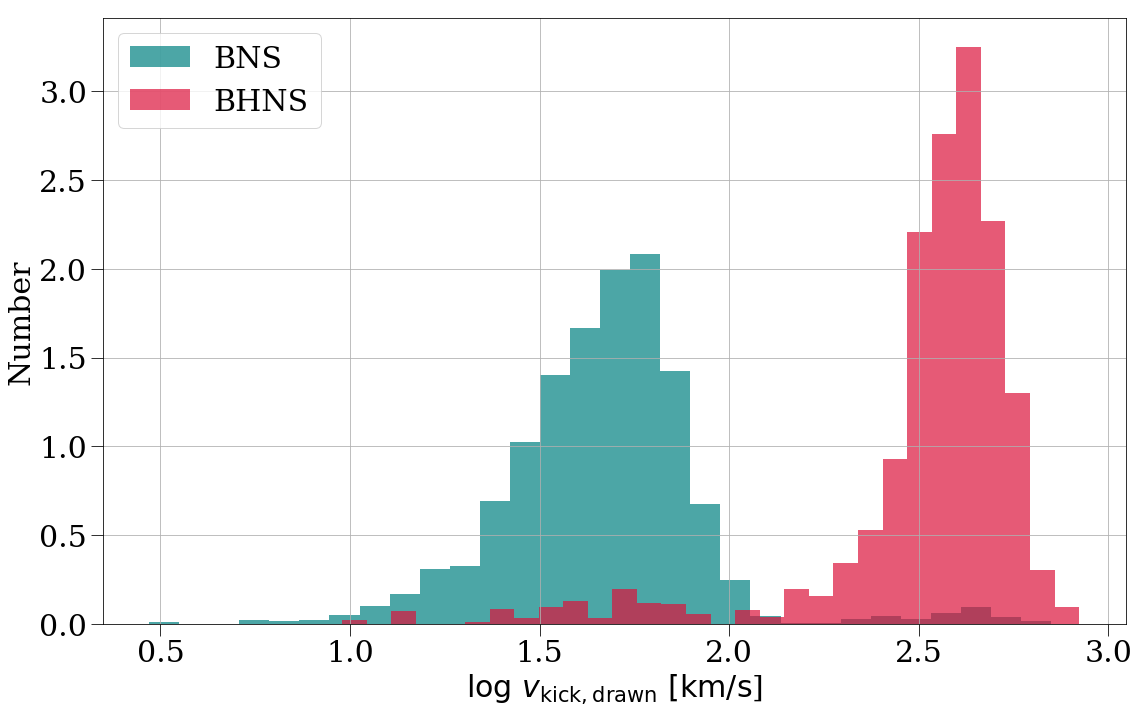

In [249]:
xparam = ['kickVelocity', 'supernovae' , [r'$\log \ v_{\rm{kick, drawn}} \ [\rm{km/s}$]', 'Number']] 
PlotDistanceTraveledTemp(globpar, UFDparameters, xparam = xparam) 

In [ ]:
kickVelocity

In [218]:
# path = '/Volumes/TOSHIBA EXT/Stroopwafel2_0/'



def PlotScatterCandidates(globpar, UFDpar, Xeffvalue):  #directory_names, 
    # names = DirNames in [['BH-NS dir names'], ['NS-NS dir names']]
    
    # Constants 
    KpcToKM = 3.086 * 10**(16) # kpc to km  
    MyrToYr = 1E6 # yrs
    YrToSec = 3.154 *1E7 #sec

    SFR = 2.0*10**6 # [SFR] = Msol Myr^-1 # The continuous star formation rate \
    # assumed in a Milky Way like Galaxy (see e.g. Dominik 2012 or de Mink & Belczynski for reference)  
#     # Convert this to a MW like galaxy  for 10 Gyr age
#      MWEGStarFormation=10*(10**3)*SFR  

    
    colors = ['teal', 'gold']
    
    pathdisk, DCOtypeList, DirNameList, ListDCOmask = globpar
#     globpar = [pathdisk, DCOtypeList, DirNameList, boolDCOmask]
    UFDepsilon, UFDrvir = UFDpar    
    
    f, ax = plt.subplots(1, 2,  figsize=(20,10))   
     
    radiusUFDgalaxy = UFDepsilon * UFDrvir * KpcToKM   # enriching radius in km     
    radiusUFDgalaxy2 = UFDepsilon * 1.3 * KpcToKM   # km         
    d_max2 = 1E3 * radiusUFDgalaxy2 / KpcToKM  
    d_max1 = 1E3 * radiusUFDgalaxy / KpcToKM   
    ############.  BNS data #########
    for ii, _ in enumerate(DCOtypeList): 
        
        tc,  DCOweights = obtainDataSTROOPWAFEL(i = ii,  param = ['tc', 'doubleCompactObjects'], global_param = globpar)
        # obtain systematic velocity of binary in [km/s]
        vsys, _ = obtainDataSTROOPWAFEL(i = ii, param = ['systemicVelocity', 'supernovae'], global_param = globpar)
        ## SN are double since we have 2 SN per merging system. But 1st SN is always primary, and 2nd seconday, we only need one vsys
        vsys = vsys[1:][::2]

        # determine which DCO systems are candidate for enriching UFD galaxies:
        traveldistance = tc * vsys *  MyrToYr * YrToSec  # this is in km 
        
        maskCandidates = (traveldistance <= radiusUFDgalaxy) # the DCO is a candidate if it merges before travelling outside of the galaxy
        

        maskCandidates2 = (traveldistance <= radiusUFDgalaxy2)
        
        
        if DCOtypeList[ii] == 'BHNS':
            m1 , _ = obtainDataSTROOPWAFEL(i = ii, param = ['M1', 'doubleCompactObjects'], global_param = globpar)
            m2 , _ = obtainDataSTROOPWAFEL(i = ii, param = ['M2', 'doubleCompactObjects'], global_param = globpar)
            
            r_ns = np.asarray([13]*len(m1)) # radius in Rsun
            
            
            m1bh, m2ns = obtainM1BHandM2BHassymetric(m1, m2)
            
            
            Mejected = calculateEjectedMassMerger(m2ns, r_ns, m1bh, Xeffvalue)

            maskCandidatesBHNSnotDisrupted = (traveldistance <= radiusUFDgalaxy) & (Mejected > 0)
            maskCandidatesBHNSnotDisrupted2 = (traveldistance <= radiusUFDgalaxy2) & (Mejected > 0)
            
            fractionBHNSCandidatesDisrupted = np.sum(maskCandidatesBHNSnotDisrupted) / np.sum(maskCandidates)
        
            maskCandidates = maskCandidatesBHNSnotDisrupted
            maskCandidates2 = maskCandidatesBHNSnotDisrupted2

            
        BINS = np.linspace(0, d_max1, 30)
        ax[ii].scatter(np.log10(vsys), np.log10(tc), s = 6, color = 'gray' ,  zorder = 1, edgecolor='gray', linewidth=0.3)
        ax[ii].scatter(np.log10(vsys[maskCandidates]), np.log10(tc[maskCandidates]), s = 6, color = colors[ii] ,  zorder = 10, edgecolor='black', linewidth=0.5)
#             axarr1.hist(((traveldistance[maskCandidates2] ) * (1E3/ KpcToKM)), bins  = BINS,  weights =  DCOweights[maskCandidates2], \
#                     color = colors[ii], lw = 3, histtype = 'stepfilled',  alpha = 1)

#         axarr1.set_ylabel(r'$\rm{Rate} \ \mathcal{R}_{\rm{Candidate}} \ [\rm{Myr}^{-1} \ \rm{MWEG}^{-1}]  $' , fontsize = fs)
#         axarr1.set_xlabel(r'$\, \rm{Traveled} \ \rm{distance}  \ [\rm{pc}]$', fontsize = fs)    
        arrowlocation = [-1, 1,3,5,7,9]
        yloc_text = 6.15
        yloc_text2 = 2.15

       
    
        yy = 10**np.linspace(-7,4, 20)
        xx_galaxy2 = d_max2 / yy 
        ax[ii].plot(np.log10(xx_galaxy2), np.log10(yy) , color = 'k', lw = 3, linestyle = ':')
        xx_galaxy1 = d_max1 / yy 
        ax[ii].plot(np.log10(xx_galaxy1), np.log10(yy) , color = 'k', lw = 3, linestyle = ':')        

        

        
        
        
#     axarr1.legend(fontsize = fs, loc = 'upper center')

#     axarr1.ticklabel_format(style = 'sci', axis = 'both')

        ax[ii].set_xlabel(r'$\log \ v_{\rm{sys}} \ [\rm{km/s}]$', fontsize = fs)
        ax[ii].set_ylabel(r'$\log \ \rm{t}_{\rm{coalescence}} \ [\rm{Myr}^{-1} ]  $' , fontsize = fs)
        ax[ii].grid(True)
        ax[ii].tick_params(labelsize=fs)

        ax[ii].set_xlim(0, 3)    
        ax[ii].set_ylim(-6, 4.147)
    

        ax[ii].text(0.05, 2.8,  r"$r_{\rm{vir}} \approx 4.6 \ \rm{kpc} $ halo", rotation = -17, fontsize = fs-10, color = 'k')#, weight = 'bold')
        ax[ii].text(0.05, 2.2,  r"$r_{\rm{vir}} \approx 1.3 \ \rm{kpc} $ halo", rotation = -17, fontsize = fs-10, color = 'k')#, weight = 'bold')

        ax[ii].text(0.2, -5.7, LabelsDCO[ii] , rotation = 0, fontsize = fs+8, color = 'k', ha = 'left')#, weight = 'bold')
#     axarr1.text(6, 4*1E1, "BH-NS" , rotation = 0, fontsize = fs+8, color = 'k', ha = 'center')#, weight = 'bold')
    
#     plt.xticks(range(len(ListBNSdirectory)+len(ListBHNSdirectory)+2), names, rotation=45)
    plt.tight_layout()
#     if pdf == True:

#         axarr1.set_ylabel(r'$\rm{Rate} \ \mathcal{R}_{\rm{Candidate}} \ [\rm{Myr}^{-1} \ \rm{MWEG}^{-1}]  $' , fontsize = fs)
#         plt.savefig('/Users/fbro0003/Documents/git/popsynth/Papers/BroekgaardenEtAl/BHNSmergers/images/traveldistancePDF_Xeff' + str(Xeffvalue) + '.png', dpi = 300)
#         plt.savefig('/Users/fbro0003/Documents/git/popsynth/Papers/BroekgaardenEtAl/BHNSmergers/images/traveldistancePDF_Xeff' + str(Xeffvalue) + '.pdf')
        
#     else: 
#         axarr1.set_ylim(0, 40)
#         axarr1.set_ylabel(r'$\rm{Cumulative} \ \rm{Rate} \ \mathcal{R}_{\rm{Candidate}} \ [\rm{Myr}^{-1} \ \rm{MWEG}^{-1}]  $' , fontsize = fs)
    plt.savefig('/Users/fbro0003/Documents/git/popsynth/Papers/BroekgaardenEtAl/BHNSmergers/images/scatterCandidates_Xeff.png', dpi = 300)
    plt.savefig('/Users/fbro0003/Documents/git/popsynth/Papers/BroekgaardenEtAl/BHNSmergers/images/scatterCandidates_Xeff.pdf')
    plt.show()  

    
    
    





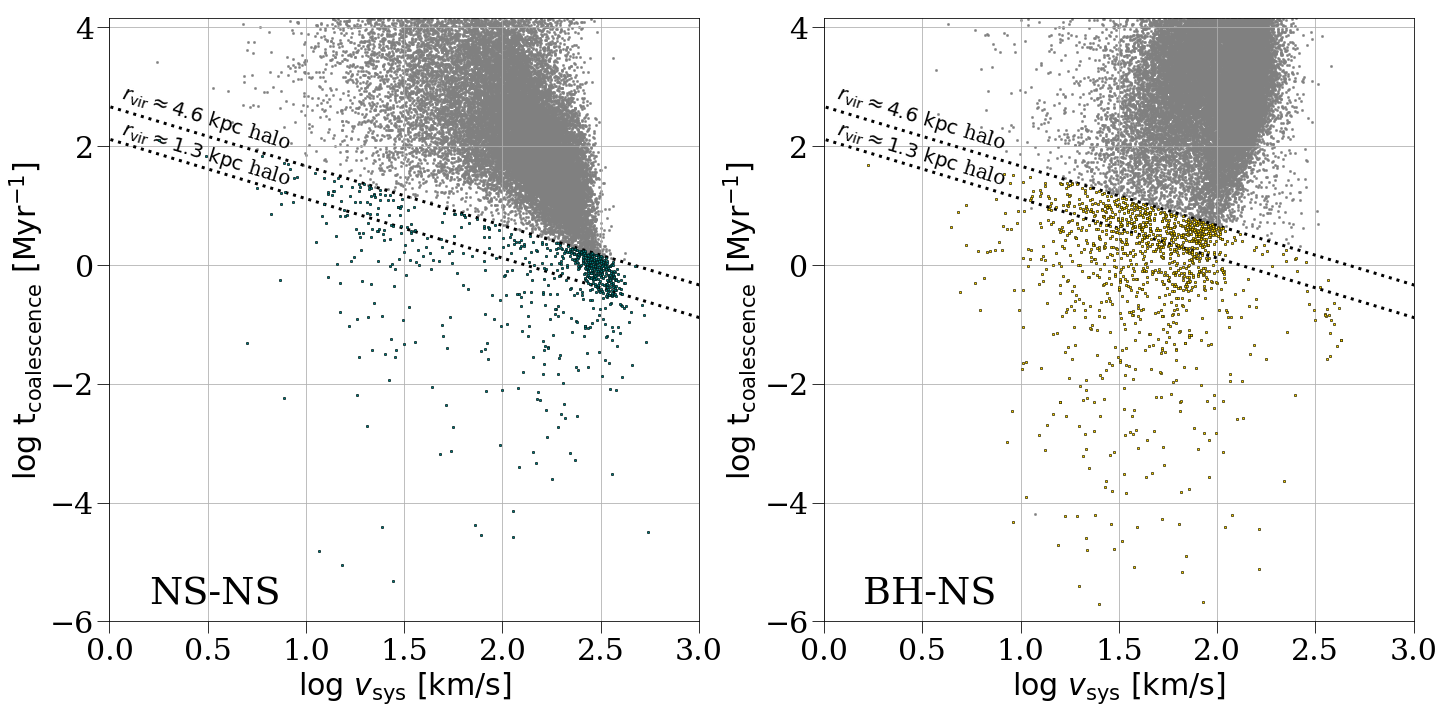

In [219]:
LabelsDCO = ['NS-NS', 'BH-NS ']
path = '/Volumes/TOSHIBA EXT/BHNSpaper19/'

globpar = [path, ['BNS', 'BHNS'], ['BNSZ0_002', 'BHNSZ0_002'], ['True', 'True', 'False']]
UFDparameters = [0.1, 4.6] # 

PlotScatterCandidates(globpar = globpar, UFDpar = UFDparameters, Xeffvalue=0.97)

In [28]:
np.log10(25)

1.3979400086720377